In [2]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df_players=pd.read_csv("players.csv") # NBA 2019-2020 reg. season stats
df_players=df_players.fillna(0) # fill empty stats with 0
df_players["Player"]=df_players["Player"].str.upper()
df_players=df_players.drop_duplicates(subset="Player",keep="last") # drop duplicates, keep highest one
df_players["F-PTS"] = df_players.apply(lambda row: (row.PTS+row.TRB*1.2+
                                                    row.AST*1.5+row.STL*3+row.BLK*3-row.TOV), axis = 1) # fantasy points
stats=["G","GS","MP","FG","FGA","FGP","3P","3PA","3PP","2P",
       "2PA","2PP","eFGP","FT","FTA","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS"] # stat columns

# regression points for every position
score_ovr=[]
score_ovr2=[]
score_pg=[]
score_sg=[]
score_g=[]
score_sf=[]
score_pf=[]
score_f=[]
score_c=[]
# relevant stats for every position
relevant_stats_ovr=[]
relevant_stats_ovr2=[]
relevant_stats_pg=[]
relevant_stats_sg=[]
relevant_stats_g=[]
relevant_stats_sf=[]
relevant_stats_pf=[]
relevant_stats_f=[]
relevant_stats_c=[]

## OVERALL

In [4]:
ovr_df3=df_players
# sort players based on F-PTS
ovr_df3.sort_values("F-PTS",inplace=True,ascending=False)
# display player name, position, & fantasy points
ovr_df3=ovr_df3.loc[:,["Player","POS","F-PTS"]]
# print top 25 players
print("TOP 25 PLAYERS BY F-PTS")
display(ovr_df3.head(25).style.hide_index())

TOP 25 PLAYERS BY F-PTS


Player,POS,F-PTS
JAMES HARDEN,SG,57.070000
GIANNIS ANTETOKOUNMPO,PF,56.520000
LUKA DONCIC,PG,52.580000
LEBRON JAMES,PG,51.160000
ANTHONY DAVIS,PF,50.960000
KARL-ANTHONY TOWNS,C,49.260000
RUSSELL WESTBROOK,PG,48.680000
DAMIAN LILLARD,PG,48.460000
KAWHI LEONARD,SF,47.570000
TRAE YOUNG,PG,47.510000


In [5]:
ovr_df2=df_players

for x in stats:
    # re-shape array into single column
    X=ovr_df2[x].values.reshape(-1,1)
    y=ovr_df2["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    score=regressor.score(X_test,y_test)
    score_ovr2.append(score)
    relevant_stats_ovr2.append(x)
    
# rank stats by score
order=[i for _,i in sorted(zip(score_ovr2,relevant_stats_ovr2),reverse=True)]

for y in order:
    # sort by relevant stat
    if y=="TOV" or y=="PF":
        ovr_fpts=ovr_df2.sort_values(by=[y,"F-PTS"],ascending=[True,False])
    else:
        ovr_fpts=ovr_df2.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy point
    ovr_fpts=ovr_fpts.loc[:,["Player","POS",y,"F-PTS"]]
    # print top player per stat
    display(ovr_fpts.head(5).style.hide_index())
    print()

Player,POS,FG,F-PTS
GIANNIS ANTETOKOUNMPO,PF,10.900000,56.520000
RUSSELL WESTBROOK,PG,10.600000,48.680000
BRADLEY BEAL,SG,10.400000,46.090000
KYRIE IRVING,PG,10.000000,46.340000
JAMES HARDEN,SG,9.900000,57.070000


Player,POS,PTS,F-PTS
JAMES HARDEN,SG,34.300000,57.070000
BRADLEY BEAL,SG,30.500000,46.090000
DAMIAN LILLARD,PG,30.000000,48.460000
TRAE YOUNG,PG,29.600000,47.510000
GIANNIS ANTETOKOUNMPO,PF,29.500000,56.520000


Player,POS,FGA,F-PTS
BRADLEY BEAL,SG,22.900000,46.090000
RUSSELL WESTBROOK,PG,22.500000,48.680000
JAMES HARDEN,SG,22.300000,57.070000
KYRIE IRVING,PG,20.800000,46.340000
TRAE YOUNG,PG,20.800000,47.510000


Player,POS,2PA,F-PTS
RUSSELL WESTBROOK,PG,18.700000,48.680000
GIANNIS ANTETOKOUNMPO,PF,15.000000,56.520000
DEMAR DEROZAN,SF,14.900000,38.600000
DEANDRE AYTON,C,14.600000,39.350000
ZION WILLIAMSON,PF,14.400000,34.010000


Player,POS,2P,F-PTS
RUSSELL WESTBROOK,PG,9.600000,48.680000
GIANNIS ANTETOKOUNMPO,PF,9.500000,56.520000
ZION WILLIAMSON,PF,8.500000,34.010000
DEMAR DEROZAN,SF,8.100000,38.600000
DEANDRE AYTON,C,8.100000,39.350000


Player,POS,MP,F-PTS
DAMIAN LILLARD,PG,37.500000,48.460000
JAMES HARDEN,SG,36.500000,57.070000
CJ MCCOLLUM,SG,36.500000,36.240000
KYLE LOWRY,PG,36.200000,38.950000
BRADLEY BEAL,SG,36.000000,46.090000


Player,POS,TOV,F-PTS
ERIC MIKA,C,0.000000,14.400000
DEVONTAE CACOK,C,0.000000,13.500000
JAMAL CRAWFORD,SG,0.000000,9.500000
CHASSON RANDLE,PG,0.000000,7.190000
JARROD UTHOFF,PF,0.000000,7.040000


Player,POS,FTA,F-PTS
JAMES HARDEN,SG,11.800000,57.070000
GIANNIS ANTETOKOUNMPO,PF,10.000000,56.520000
TRAE YOUNG,PG,9.300000,47.510000
LUKA DONCIC,PG,9.200000,52.580000
JIMMY BUTLER,SF,9.100000,41.940000


Player,POS,FT,F-PTS
JAMES HARDEN,SG,10.200000,57.070000
TRAE YOUNG,PG,8.000000,47.510000
JIMMY BUTLER,SF,7.600000,41.940000
ANTHONY DAVIS,PF,7.200000,50.960000
LUKA DONCIC,PG,7.000000,52.580000


Player,POS,DRB,F-PTS
GIANNIS ANTETOKOUNMPO,PF,11.400000,56.520000
ANDRE DRUMMOND,C,10.800000,46.890000
RUDY GOBERT,C,10.100000,40.050000
HASSAN WHITESIDE,C,9.700000,41.600000
CLINT CAPELA,C,9.500000,38.460000


Player,POS,AST,F-PTS
LEBRON JAMES,PG,10.200000,51.160000
TRAE YOUNG,PG,9.300000,47.510000
LUKA DONCIC,PG,8.800000,52.580000
RICKY RUBIO,PG,8.800000,33.940000
BEN SIMMONS,PG,8.000000,42.360000


Player,POS,TRB,F-PTS
ANDRE DRUMMOND,C,15.200000,46.890000
CLINT CAPELA,C,13.800000,38.460000
GIANNIS ANTETOKOUNMPO,PF,13.600000,56.520000
RUDY GOBERT,C,13.500000,40.050000
HASSAN WHITESIDE,C,13.500000,41.600000


Player,POS,STL,F-PTS
BEN SIMMONS,PG,2.100000,42.360000
KRIS DUNN,PG,2.000000,22.320000
FRED VANVLEET,SG,1.900000,36.460000
ANDRE DRUMMOND,C,1.900000,46.890000
JAMES HARDEN,SG,1.800000,57.070000


Player,POS,GS,F-PTS
DILLON BROOKS,SG,73,25.510000
NIKOLA JOKIĆ,C,73,44.340000
HARRISON BARNES,PF,72,24.880000
TOBIAS HARRIS,PF,72,35.180000
BAM ADEBAYO,PF,72,40.190000


Player,POS,PF,F-PTS
DEVONTAE CACOK,C,0.000000,13.500000
LUC MBAH A MOUTE,PF,0.000000,4.340000
TYLER ZELLER,C,0.000000,3.400000
MALIK NEWMAN,SG,0.000000,1.000000
JARED HARPER,PG,0.000000,0.700000


Player,POS,3PA,F-PTS
JAMES HARDEN,SG,12.400000,57.070000
DAMIAN LILLARD,PG,10.200000,48.460000
STEPHEN CURRY,PG,9.800000,37.940000
D'ANGELO RUSSELL,PG,9.600000,38.130000
BUDDY HIELD,SG,9.600000,30.220000


Player,POS,3P,F-PTS
JAMES HARDEN,SG,4.400000,57.070000
DAMIAN LILLARD,PG,4.100000,48.460000
BUDDY HIELD,SG,3.800000,30.220000
DĀVIS BERTĀNS,PF,3.700000,26.150000
DUNCAN ROBINSON,SG,3.700000,20.840000


Player,POS,G,F-PTS
MAXI KLEBER,PF,74,20.540000
JUSTIN HOLIDAY,SF,73,19.010000
DILLON BROOKS,SG,73,25.510000
MONTE MORRIS,PG,73,18.830000
DUNCAN ROBINSON,SG,73,20.840000


Player,POS,ORB,F-PTS
ANDRE DRUMMOND,C,4.400000,46.890000
CLINT CAPELA,C,4.300000,38.460000
TRISTAN THOMPSON,PF,4.000000,29.970000
DEANDRE AYTON,C,3.900000,39.350000
HASSAN WHITESIDE,C,3.900000,41.600000


Player,POS,BLK,F-PTS
HASSAN WHITESIDE,C,2.900000,41.600000
BROOK LOPEZ,C,2.400000,28.070000
JONATHAN ISAAC,PF,2.300000,32.460000
ANTHONY DAVIS,PF,2.300000,50.960000
MYLES TURNER,C,2.100000,28.820000


Player,POS,3PP,F-PTS
JOHNATHAN MOTLEY,PF,1.000000,4.260000
TONY BRADLEY,C,1.000000,12.920000
DREW EUBANKS,C,1.000000,12.630000
DUSTY HANNAHS,SG,0.667000,6.600000
JARROD UTHOFF,PF,0.600000,7.040000


Player,POS,eFGP,F-PTS
KOSTAS ANTETOKOUNMPO,PF,1.000000,2.520000
TACKO FALL,C,0.786000,7.670000
TYSON CHANDLER,C,0.778000,5.800000
DEAN WADE,PF,0.769000,5.120000
JOHNATHAN MOTLEY,PF,0.767000,4.260000


Player,POS,FGP,F-PTS
KOSTAS ANTETOKOUNMPO,PF,1.000000,2.520000
TACKO FALL,C,0.786000,7.670000
TYSON CHANDLER,C,0.778000,5.800000
MITCHELL ROBINSON,C,0.742000,27.100000
JOHNATHAN MOTLEY,PF,0.733000,4.260000


Player,POS,2PP,F-PTS
KYLE GUY,SG,1.000000,2.110000
KOSTAS ANTETOKOUNMPO,PF,1.000000,2.520000
MAX STRUS,SF,1.000000,3.100000
NAZ MITROU-LONG,SG,0.800000,7.480000
TACKO FALL,C,0.786000,7.670000


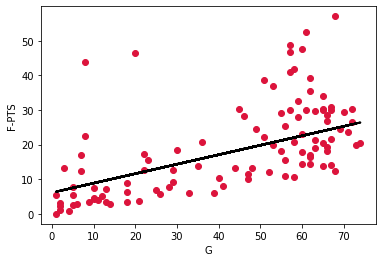

0.3407474286424719


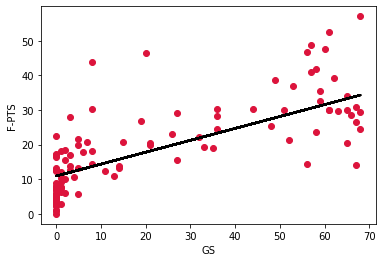

0.556217722808416


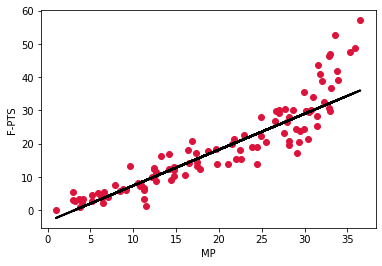

0.8185835289342906


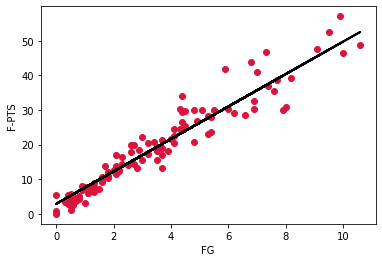

0.9201917812467045


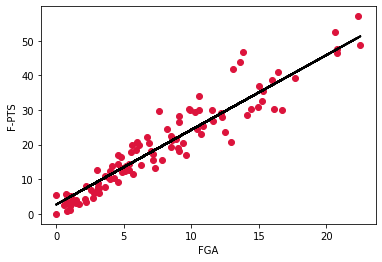

0.9011877639316818


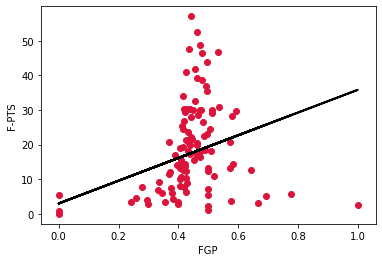

0.008726436783750735


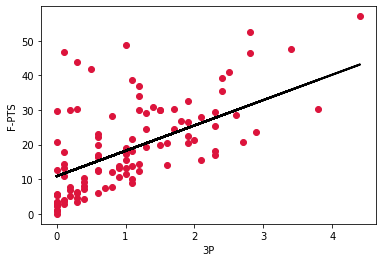

0.39459149739251353


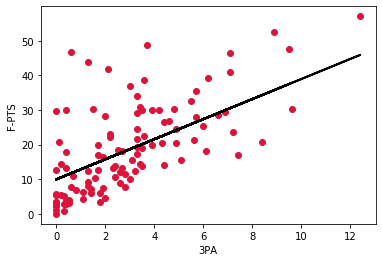

0.41526273392395174


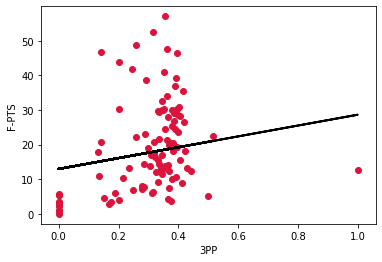

0.08095781732450014


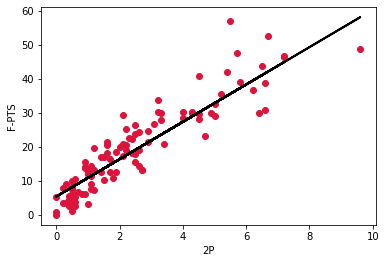

0.8381350122602349


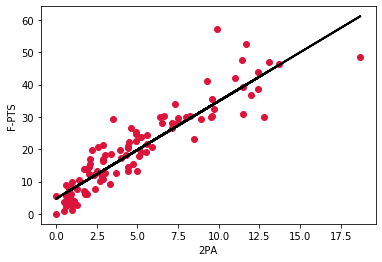

0.844647272502813


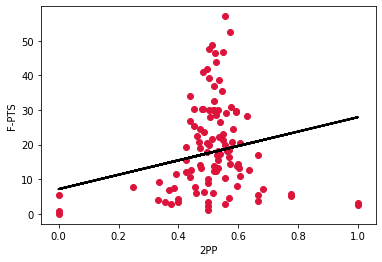

-0.010370704638273942


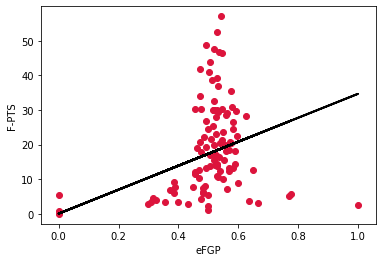

0.0242135477763209


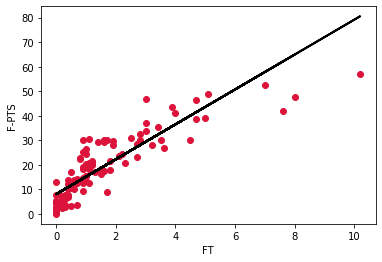

0.7348138795706896


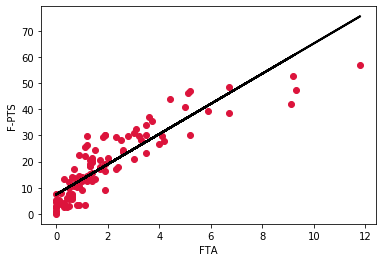

0.7630327985733012


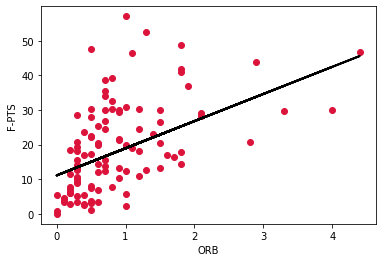

0.26128361675660605


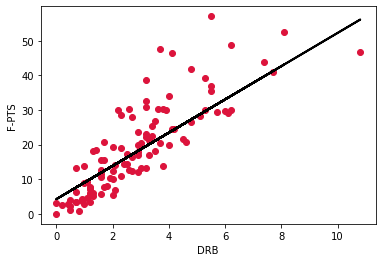

0.6820564114124543


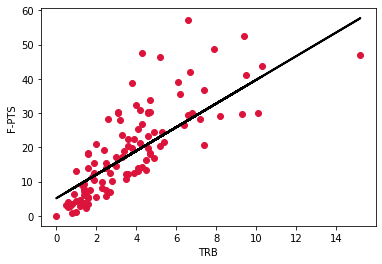

0.6061445995376232


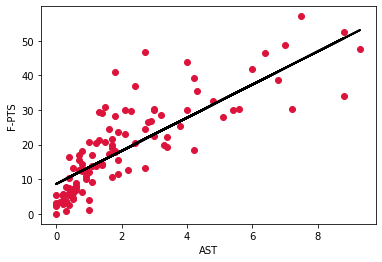

0.6789071048033124


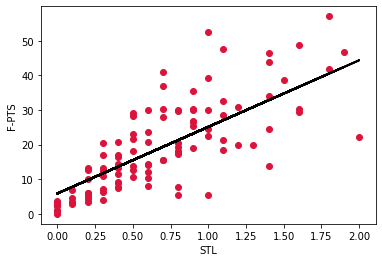

0.587871012472109


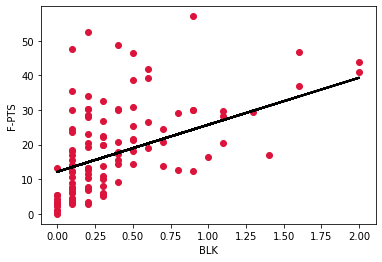

0.24895779416013286


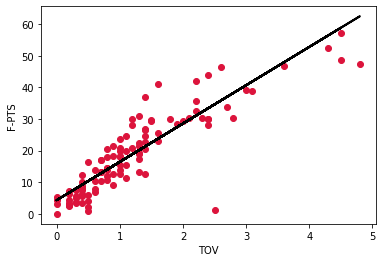

0.7742513174224583


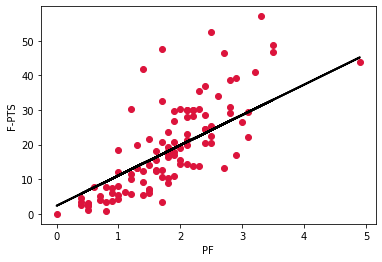

0.5425034256504311


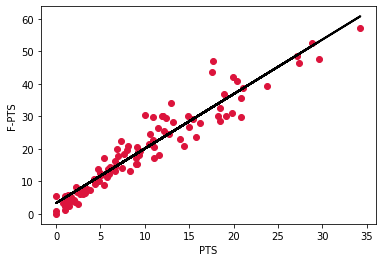

0.9162137787442047


In [6]:
# create df specifically for position
ovr_df=df_players

for x in stats:
    # re-shape array into single column
    X=ovr_df[x].values.reshape(-1,1)
    y=ovr_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="crimson")
    plt.plot(X_test,y_pred,color="black",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_ovr.append(score)
        relevant_stats_ovr.append(x)

In [7]:
# rank stats by score
order_ovr=[i for _,i in sorted(zip(score_ovr,relevant_stats_ovr),reverse=True)]
print()
print("RELEVANT STATS:",order_ovr)


RELEVANT STATS: ['FG', 'PTS', 'FGA', '2PA', '2P', 'MP']


In [8]:
for y in order_ovr:
    print("SORTED BY:",y)
    # sort by relevant stat
    ovr_fpts=ovr_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    ovr_fpts=ovr_fpts.loc[:,["Player","POS",y,"F-PTS"]]
    # print top 25 players per stat
    display(ovr_fpts.head(25).style.hide_index())
    print()

SORTED BY: FG


Player,POS,FG,F-PTS
GIANNIS ANTETOKOUNMPO,PF,10.900000,56.520000
RUSSELL WESTBROOK,PG,10.600000,48.680000
BRADLEY BEAL,SG,10.400000,46.090000
KYRIE IRVING,PG,10.000000,46.340000
JAMES HARDEN,SG,9.900000,57.070000
LEBRON JAMES,PG,9.600000,51.160000
LUKA DONCIC,PG,9.500000,52.580000
DAMIAN LILLARD,PG,9.500000,48.460000
KAWHI LEONARD,SF,9.300000,47.570000
TRAE YOUNG,PG,9.100000,47.510000



SORTED BY: PTS


Player,POS,PTS,F-PTS
JAMES HARDEN,SG,34.300000,57.070000
BRADLEY BEAL,SG,30.500000,46.090000
DAMIAN LILLARD,PG,30.000000,48.460000
TRAE YOUNG,PG,29.600000,47.510000
GIANNIS ANTETOKOUNMPO,PF,29.500000,56.520000
LUKA DONCIC,PG,28.800000,52.580000
KYRIE IRVING,PG,27.400000,46.340000
RUSSELL WESTBROOK,PG,27.200000,48.680000
KAWHI LEONARD,SF,27.100000,47.570000
DEVIN BOOKER,SG,26.600000,40.590000



SORTED BY: FGA


Player,POS,FGA,F-PTS
BRADLEY BEAL,SG,22.900000,46.090000
RUSSELL WESTBROOK,PG,22.500000,48.680000
JAMES HARDEN,SG,22.300000,57.070000
KYRIE IRVING,PG,20.800000,46.340000
TRAE YOUNG,PG,20.800000,47.510000
LUKA DONCIC,PG,20.600000,52.580000
DAMIAN LILLARD,PG,20.400000,48.460000
ZACH LAVINE,SG,20.000000,40.160000
KAWHI LEONARD,SF,19.900000,47.570000
GIANNIS ANTETOKOUNMPO,PF,19.700000,56.520000



SORTED BY: 2PA


Player,POS,2PA,F-PTS
RUSSELL WESTBROOK,PG,18.700000,48.680000
GIANNIS ANTETOKOUNMPO,PF,15.000000,56.520000
DEMAR DEROZAN,SF,14.900000,38.600000
DEANDRE AYTON,C,14.600000,39.350000
ZION WILLIAMSON,PF,14.400000,34.010000
BRADLEY BEAL,SG,14.400000,46.090000
ANTHONY DAVIS,PF,14.200000,50.960000
KAWHI LEONARD,SF,14.200000,47.570000
KYRIE IRVING,PG,13.700000,46.340000
ANDRE DRUMMOND,C,13.100000,46.890000



SORTED BY: 2P


Player,POS,2P,F-PTS
RUSSELL WESTBROOK,PG,9.600000,48.680000
GIANNIS ANTETOKOUNMPO,PF,9.500000,56.520000
ZION WILLIAMSON,PF,8.500000,34.010000
DEMAR DEROZAN,SF,8.100000,38.600000
DEANDRE AYTON,C,8.100000,39.350000
ANTHONY DAVIS,PF,7.700000,50.960000
MONTREZL HARRELL,C,7.500000,33.070000
BRADLEY BEAL,SG,7.400000,46.090000
LEBRON JAMES,PG,7.400000,51.160000
JOHN COLLINS,PF,7.200000,41.370000



SORTED BY: MP


Player,POS,MP,F-PTS
DAMIAN LILLARD,PG,37.500000,48.460000
JAMES HARDEN,SG,36.500000,57.070000
CJ MCCOLLUM,SG,36.500000,36.240000
KYLE LOWRY,PG,36.200000,38.950000
BRADLEY BEAL,SG,36.000000,46.090000
RUSSELL WESTBROOK,PG,35.900000,48.680000
DEVIN BOOKER,SG,35.900000,40.590000
FRED VANVLEET,SG,35.700000,36.460000
BEN SIMMONS,PG,35.400000,42.360000
TRAE YOUNG,PG,35.300000,47.510000


## POINT GUARD

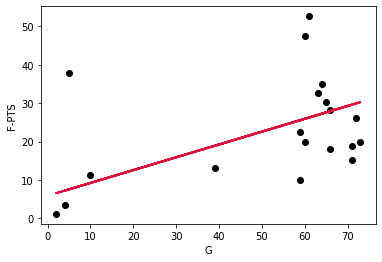

0.09097243112434772


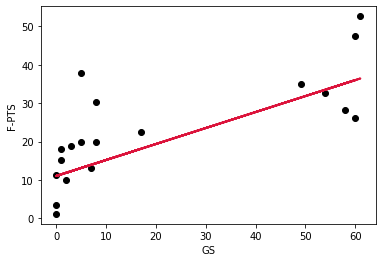

0.47756057730124357


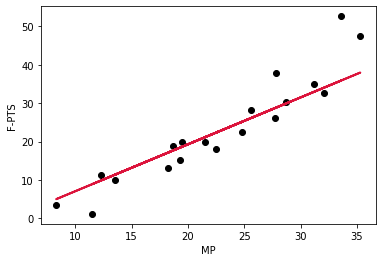

0.82629198021118


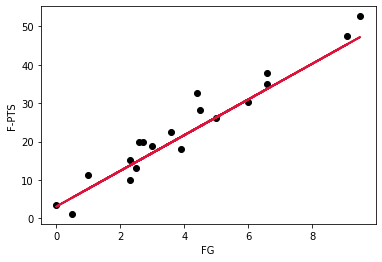

0.9227322158452366


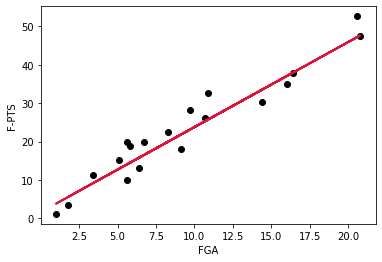

0.9275937319781149


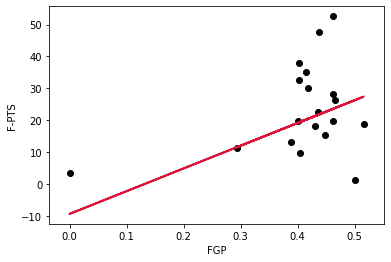

-0.0074403583913940086


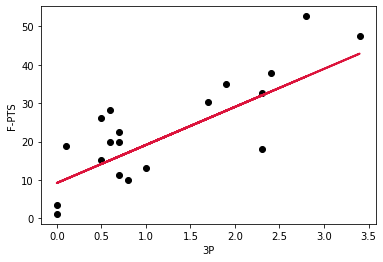

0.6404189769425042


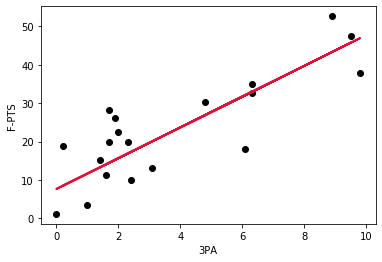

0.6760103890048421


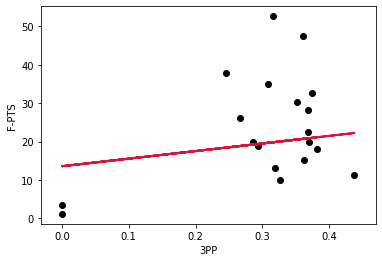

0.027890729462634045


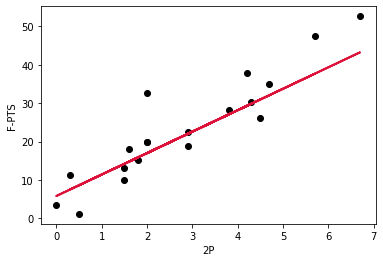

0.8036616210328759


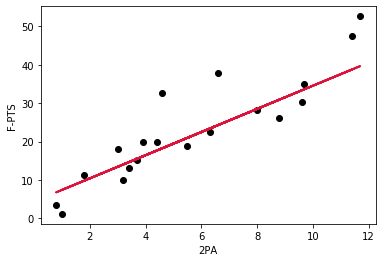

0.7687132618182336


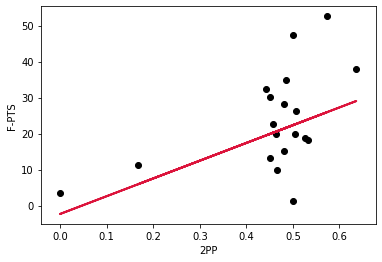

0.2037500477614409


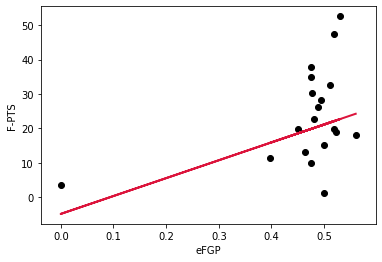

0.08329379947441617


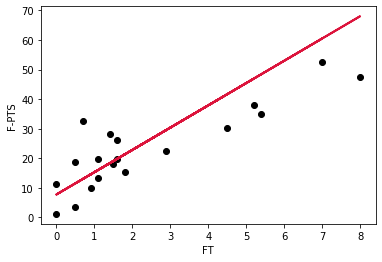

0.5003071360064879


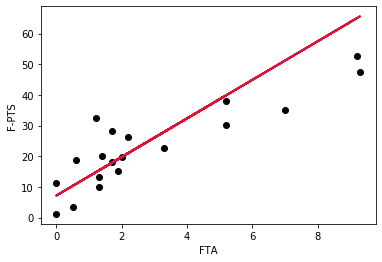

0.5451022992191443


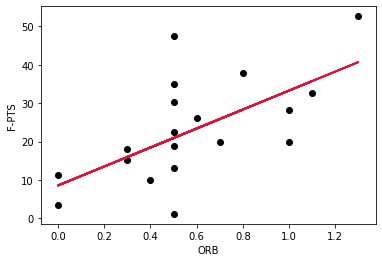

0.3959971688341034


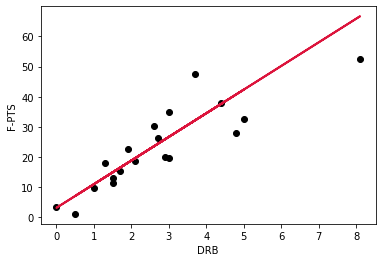

0.7089869428087076


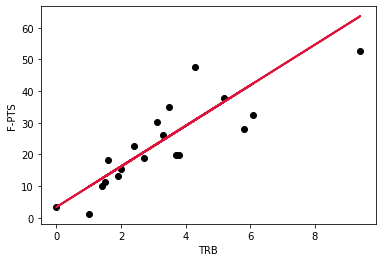

0.6975826155639945


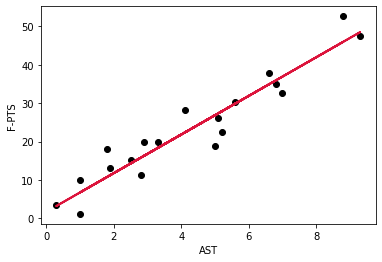

0.9016318138270359


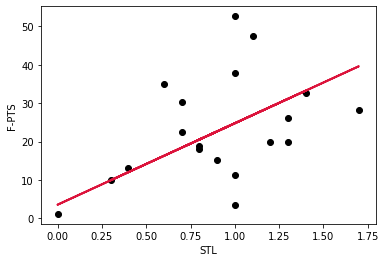

0.13244895644217092


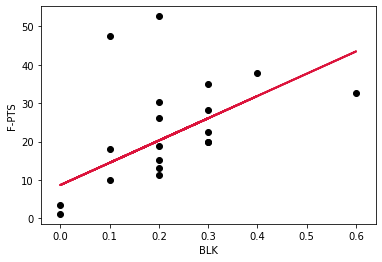

0.15572696575149336


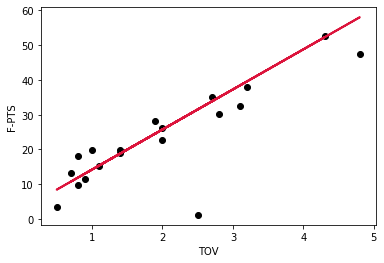

0.6408131878546854


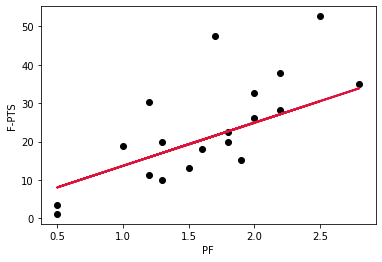

0.457670072198212


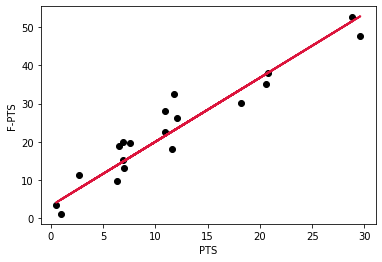

0.9060400524782964


In [9]:
# create df specifically for position
pg_df=df_players[df_players["POS"]=="PG"]

for x in stats:
    # re-shape array into single column
    X=pg_df[x].values.reshape(-1,1)
    y=pg_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="crimson",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_pg.append(score)
        relevant_stats_pg.append(x)

In [10]:
# rank stats by score
order_pg=[i for _,i in sorted(zip(score_pg,relevant_stats_pg),reverse=True)]
print()
print("RELEVANT STATS:",order_pg)


RELEVANT STATS: ['FGA', 'FG', 'PTS', 'AST', 'MP', '2P']


In [11]:
for y in order_pg:
    print("SORTED BY:",y)
    # sort by relevant stat
    pg_fpts=pg_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    pg_fpts=pg_fpts.loc[:,["Player",y,"F-PTS"]]
    # print top 25 players per stat
    display(pg_fpts.head(25).style.hide_index())
    print()

SORTED BY: FGA


Player,FGA,F-PTS
RUSSELL WESTBROOK,22.500000,48.680000
TRAE YOUNG,20.800000,47.510000
KYRIE IRVING,20.800000,46.340000
LUKA DONCIC,20.600000,52.580000
DAMIAN LILLARD,20.400000,48.460000
LEBRON JAMES,19.400000,51.160000
D'ANGELO RUSSELL,18.800000,38.130000
COLLIN SEXTON,16.700000,29.920000
STEPHEN CURRY,16.400000,37.940000
DE'AARON FOX,16.000000,38.760000



SORTED BY: FG


Player,FG,F-PTS
RUSSELL WESTBROOK,10.600000,48.680000
KYRIE IRVING,10.000000,46.340000
LEBRON JAMES,9.600000,51.160000
LUKA DONCIC,9.500000,52.580000
DAMIAN LILLARD,9.500000,48.460000
TRAE YOUNG,9.100000,47.510000
D'ANGELO RUSSELL,8.000000,38.130000
COLLIN SEXTON,7.900000,29.920000
DE'AARON FOX,7.700000,38.760000
DERRICK ROSE,7.400000,30.180000



SORTED BY: PTS


Player,PTS,F-PTS
DAMIAN LILLARD,30.000000,48.460000
TRAE YOUNG,29.600000,47.510000
LUKA DONCIC,28.800000,52.580000
KYRIE IRVING,27.400000,46.340000
RUSSELL WESTBROOK,27.200000,48.680000
LEBRON JAMES,25.300000,51.160000
D'ANGELO RUSSELL,23.100000,38.130000
DE'AARON FOX,21.100000,38.760000
STEPHEN CURRY,20.800000,37.940000
COLLIN SEXTON,20.800000,29.920000



SORTED BY: AST


Player,AST,F-PTS
LEBRON JAMES,10.200000,51.160000
TRAE YOUNG,9.300000,47.510000
LUKA DONCIC,8.800000,52.580000
RICKY RUBIO,8.800000,33.940000
DAMIAN LILLARD,8.000000,48.460000
BEN SIMMONS,8.000000,42.360000
DEVONTE' GRAHAM,7.500000,34.230000
KYLE LOWRY,7.500000,38.950000
JA MORANT,7.300000,33.730000
ELFRID PAYTON,7.200000,30.340000



SORTED BY: MP


Player,MP,F-PTS
DAMIAN LILLARD,37.500000,48.460000
KYLE LOWRY,36.200000,38.950000
RUSSELL WESTBROOK,35.900000,48.680000
BEN SIMMONS,35.400000,42.360000
TRAE YOUNG,35.300000,47.510000
DEVONTE' GRAHAM,35.100000,34.230000
LEBRON JAMES,34.600000,51.160000
TERRY ROZIER,34.300000,30.830000
LUKA DONCIC,33.600000,52.580000
COLLIN SEXTON,33.000000,29.920000



SORTED BY: 2P


Player,2P,F-PTS
RUSSELL WESTBROOK,9.600000,48.680000
LEBRON JAMES,7.400000,51.160000
KYRIE IRVING,7.200000,46.340000
LUKA DONCIC,6.700000,52.580000
DE'AARON FOX,6.600000,38.760000
BEN SIMMONS,6.500000,42.360000
DERRICK ROSE,6.500000,30.180000
COLLIN SEXTON,6.400000,29.920000
JA MORANT,5.800000,33.730000
TRAE YOUNG,5.700000,47.510000


## SHOOTING GUARD

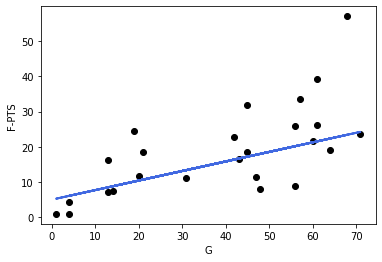

0.34546506955068623


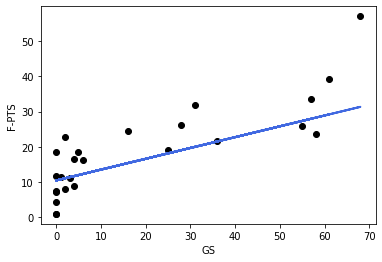

0.5880576354771441


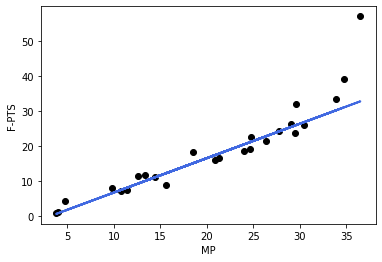

0.8060169355691793


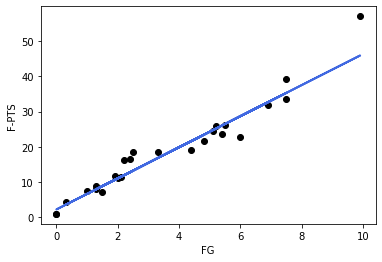

0.9327808168422722


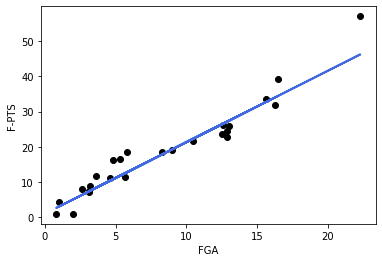

0.9224501860921229


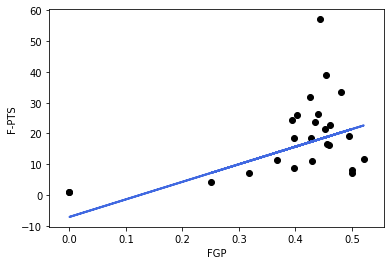

0.1410963758283088


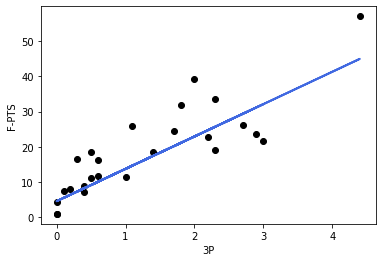

0.6930538726491825


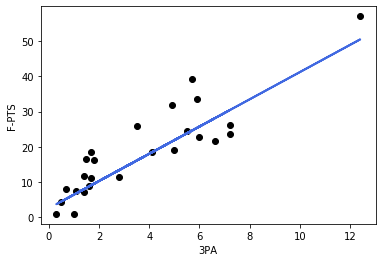

0.7683973222636855


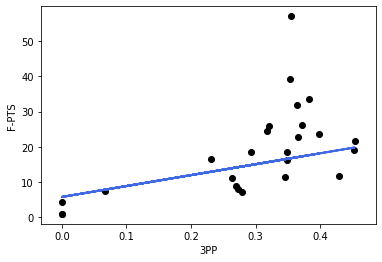

0.1870203156658501


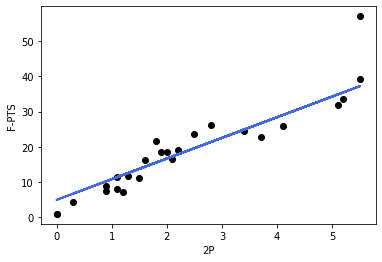

0.8443630629290891


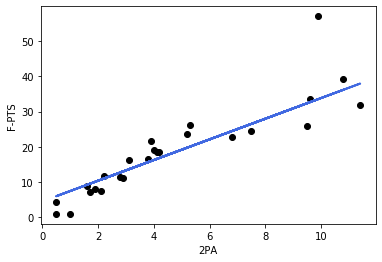

0.7846731419943086


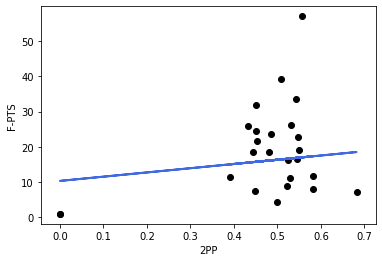

0.034412142352255426


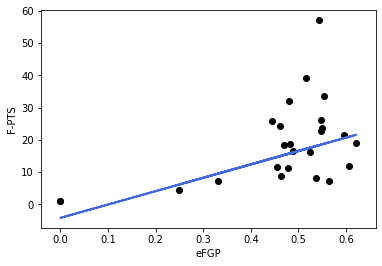

0.17048579031004674


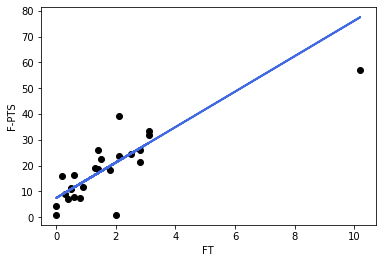

0.62212917677235


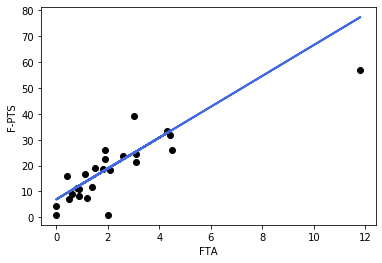

0.6717657362565312


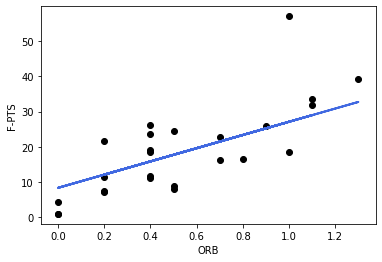

0.5382937464299961


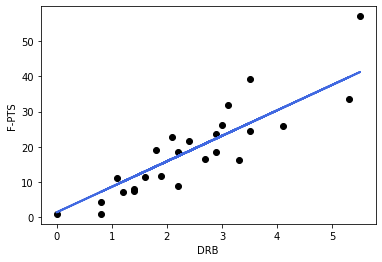

0.768801294574468


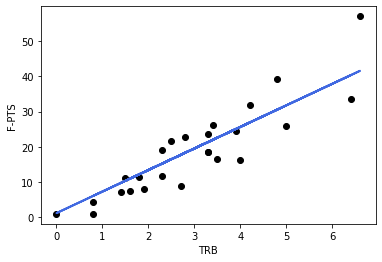

0.7945339986039368


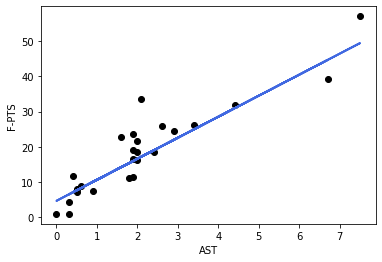

0.8270641779572848


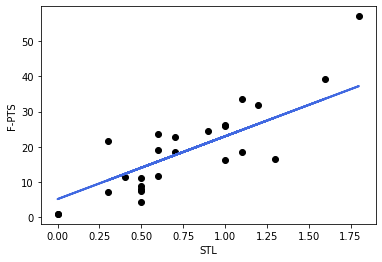

0.6763787906902737


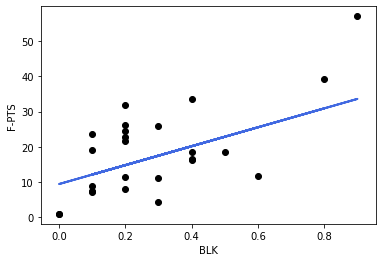

0.39593842597471074


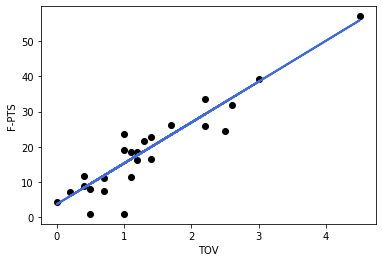

0.8555538535737226


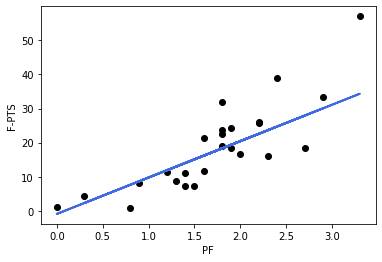

0.6418285908980814


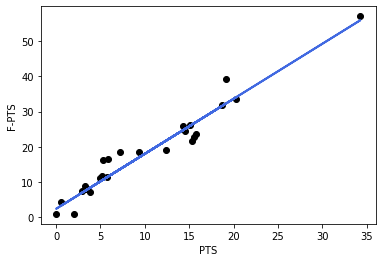

0.9444344634274765


In [12]:
# create df specifically for position
sg_df=df_players[df_players["POS"]=="SG"]

for x in stats:
    # re-shape array into single column
    X=sg_df[x].values.reshape(-1,1)
    y=sg_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="royalblue",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_sg.append(score)
        relevant_stats_sg.append(x)

In [13]:
# rank stats by score
order_sg=[i for _,i in sorted(zip(score_sg,relevant_stats_sg),reverse=True)]
print()
print("RELEVANT STATS:",order_sg)


RELEVANT STATS: ['PTS', 'FG', 'FGA', 'TOV', '2P', 'AST', 'MP']


In [14]:
for y in order_sg:
    print("SORTED BY:",y)
    # sort by relevant stat
    sg_fpts=sg_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    sg_fpts=sg_fpts.loc[:,["Player",y,"F-PTS"]]
    # print top 25 players per stat
    display(sg_fpts.head(25).style.hide_index())
    print()

SORTED BY: PTS


Player,PTS,F-PTS
JAMES HARDEN,34.300000,57.070000
BRADLEY BEAL,30.500000,46.090000
DEVIN BOOKER,26.600000,40.590000
ZACH LAVINE,25.500000,40.160000
DONOVAN MITCHELL,24.000000,36.630000
CJ MCCOLLUM,22.200000,36.240000
PAUL GEORGE,21.500000,36.990000
JAYLEN BROWN,20.300000,33.430000
BUDDY HIELD,19.200000,30.220000
JRUE HOLIDAY,19.100000,39.110000



SORTED BY: FG


Player,FG,F-PTS
BRADLEY BEAL,10.400000,46.090000
JAMES HARDEN,9.900000,57.070000
DEVIN BOOKER,9.000000,40.590000
ZACH LAVINE,9.000000,40.160000
DONOVAN MITCHELL,8.700000,36.630000
CJ MCCOLLUM,8.700000,36.240000
JRUE HOLIDAY,7.500000,39.110000
JAYLEN BROWN,7.500000,33.430000
PAUL GEORGE,7.100000,36.990000
DENNIS SCHRODER,7.000000,29.320000



SORTED BY: FGA


Player,FGA,F-PTS
BRADLEY BEAL,22.900000,46.090000
JAMES HARDEN,22.300000,57.070000
ZACH LAVINE,20.000000,40.160000
DONOVAN MITCHELL,19.400000,36.630000
CJ MCCOLLUM,19.400000,36.240000
DEVIN BOOKER,18.300000,40.590000
JRUE HOLIDAY,16.500000,39.110000
PAUL GEORGE,16.300000,36.990000
CARIS LEVERT,16.300000,31.940000
BUDDY HIELD,16.100000,30.220000



SORTED BY: TOV


Player,TOV,F-PTS
JAMES HARDEN,4.500000,57.070000
DEVIN BOOKER,3.800000,40.590000
ZACH LAVINE,3.400000,40.160000
BRADLEY BEAL,3.400000,46.090000
JRUE HOLIDAY,3.000000,39.110000
DONOVAN MITCHELL,2.700000,36.630000
DENNIS SCHRODER,2.600000,29.320000
PAUL GEORGE,2.600000,36.990000
DARIUS GARLAND,2.600000,20.230000
CARIS LEVERT,2.600000,31.940000



SORTED BY: 2P


Player,2P,F-PTS
BRADLEY BEAL,7.400000,46.090000
DEVIN BOOKER,6.900000,40.590000
DONOVAN MITCHELL,6.200000,36.630000
CJ MCCOLLUM,6.000000,36.240000
ZACH LAVINE,5.900000,40.160000
SHAI GILGEOUS-ALEXANDER,5.600000,34.530000
JAMES HARDEN,5.500000,57.070000
JRUE HOLIDAY,5.500000,39.110000
JAYLEN BROWN,5.200000,33.430000
CARIS LEVERT,5.100000,31.940000



SORTED BY: AST


Player,AST,F-PTS
JAMES HARDEN,7.500000,57.070000
JRUE HOLIDAY,6.700000,39.110000
FRED VANVLEET,6.600000,36.460000
DEVIN BOOKER,6.500000,40.590000
BRADLEY BEAL,6.100000,46.090000
TOMAS SATORANSKY,5.400000,24.580000
MARCUS SMART,4.900000,29.710000
CJ MCCOLLUM,4.400000,36.240000
CARIS LEVERT,4.400000,31.940000
DONOVAN MITCHELL,4.300000,36.630000



SORTED BY: MP


Player,MP,F-PTS
JAMES HARDEN,36.500000,57.070000
CJ MCCOLLUM,36.500000,36.240000
BRADLEY BEAL,36.000000,46.090000
DEVIN BOOKER,35.900000,40.590000
FRED VANVLEET,35.700000,36.460000
ZACH LAVINE,34.800000,40.160000
JRUE HOLIDAY,34.700000,39.110000
SHAI GILGEOUS-ALEXANDER,34.700000,34.530000
DONOVAN MITCHELL,34.300000,36.630000
JAYLEN BROWN,33.900000,33.430000


## GUARDS (PG,SG)

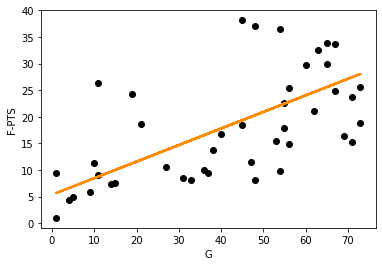

0.3517886538514883


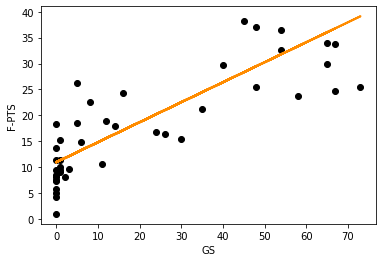

0.6498056697044048


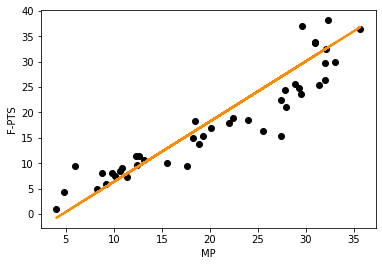

0.8267515978741118


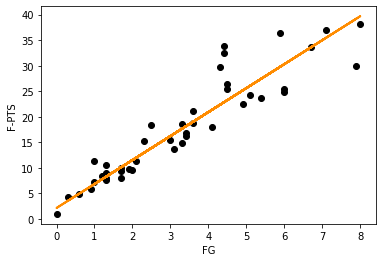

0.8584837260724103


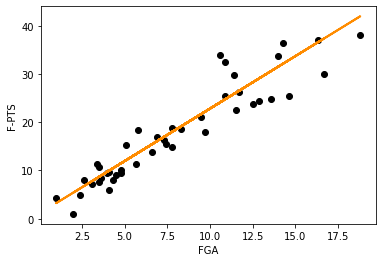

0.8711457962065918


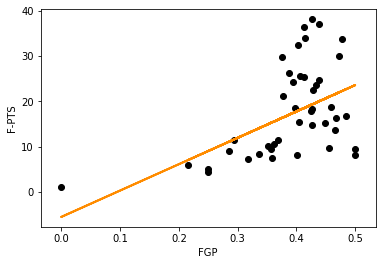

0.23968933219126354


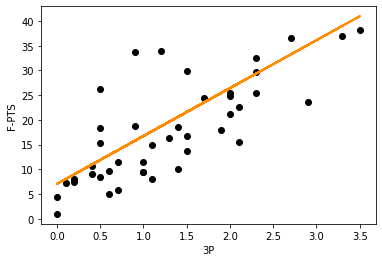

0.5373594377135759


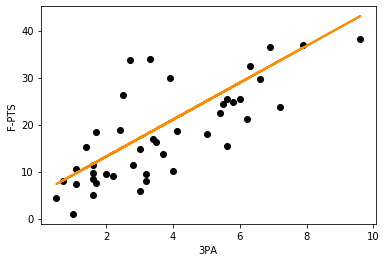

0.5297093062084347


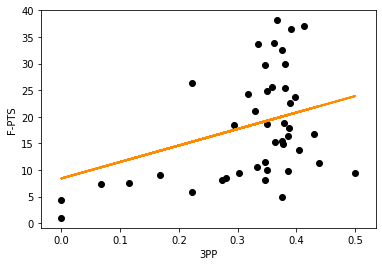

0.1824095360374247


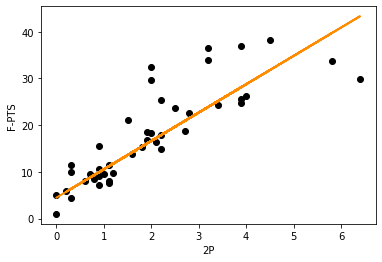

0.6912023874893292


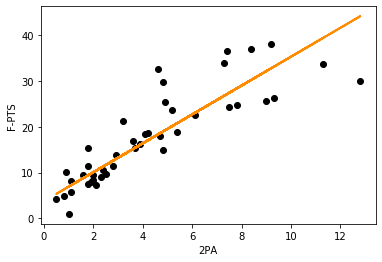

0.7351970706047921


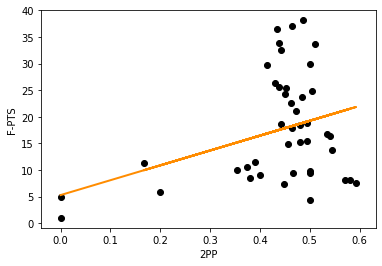

0.09460659710260622


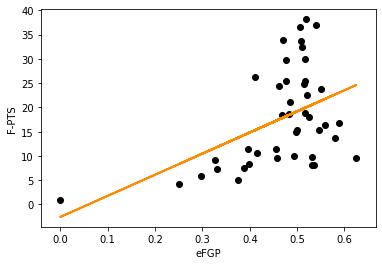

0.21507169281293237


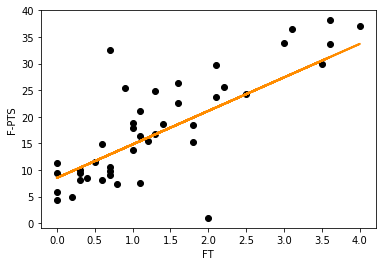

0.620208600888838


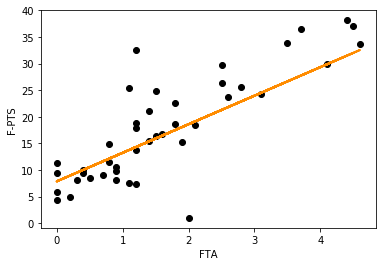

0.6595834275564465


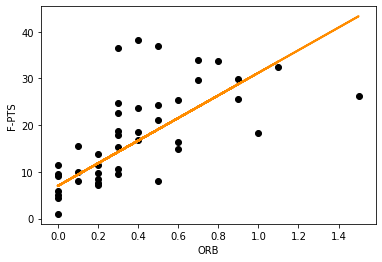

0.38088755738011004


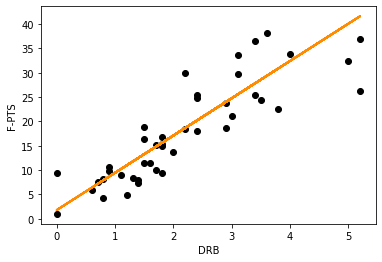

0.7268823724175806


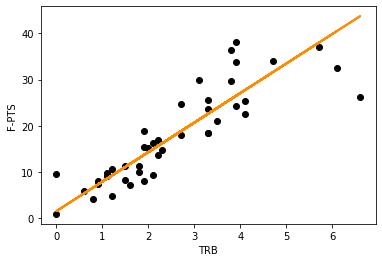

0.7384804224620574


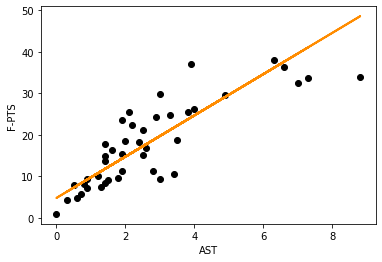

0.6798096451252235


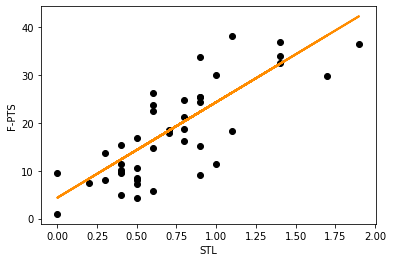

0.6159635291709709


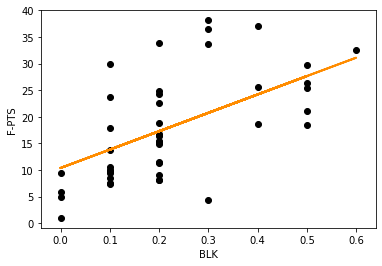

0.3585246130335473


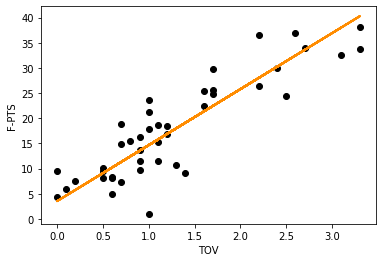

0.7633480950991024


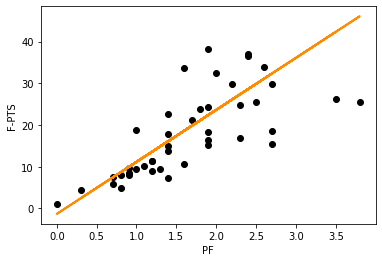

0.4216711223853252


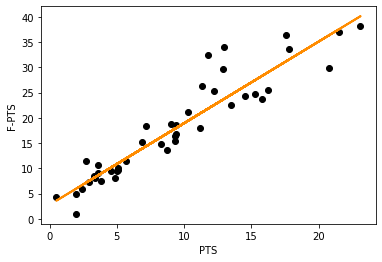

0.8754689302886616


In [15]:
# combine dataframes 
g_df=pd.concat([pg_df, sg_df], ignore_index=True)

for x in stats:
    # re-shape array into single column
    X=g_df[x].values.reshape(-1,1)
    y=g_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="darkorange",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_g.append(score)
        relevant_stats_g.append(x)

In [16]:
# rank stats by score
order_g=[i for _,i in sorted(zip(score_g,relevant_stats_g),reverse=True)]
print("RELEVANT STATS:",order_g)

RELEVANT STATS: ['PTS', 'FGA', 'FG', 'MP']


In [17]:
for y in order_g:
    print("SORTED BY:",y)
    # sort by relevant stat
    g_fpts=g_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    g_fpts=g_fpts.loc[:,["Player","POS",y,"F-PTS"]]
    # print top 25 players per stat
    display(g_fpts.head(25).style.hide_index())
    print()

SORTED BY: PTS


Player,POS,PTS,F-PTS
JAMES HARDEN,SG,34.300000,57.070000
BRADLEY BEAL,SG,30.500000,46.090000
DAMIAN LILLARD,PG,30.000000,48.460000
TRAE YOUNG,PG,29.600000,47.510000
LUKA DONCIC,PG,28.800000,52.580000
KYRIE IRVING,PG,27.400000,46.340000
RUSSELL WESTBROOK,PG,27.200000,48.680000
DEVIN BOOKER,SG,26.600000,40.590000
ZACH LAVINE,SG,25.500000,40.160000
LEBRON JAMES,PG,25.300000,51.160000



SORTED BY: FGA


Player,POS,FGA,F-PTS
BRADLEY BEAL,SG,22.900000,46.090000
RUSSELL WESTBROOK,PG,22.500000,48.680000
JAMES HARDEN,SG,22.300000,57.070000
KYRIE IRVING,PG,20.800000,46.340000
TRAE YOUNG,PG,20.800000,47.510000
LUKA DONCIC,PG,20.600000,52.580000
DAMIAN LILLARD,PG,20.400000,48.460000
ZACH LAVINE,SG,20.000000,40.160000
DONOVAN MITCHELL,SG,19.400000,36.630000
CJ MCCOLLUM,SG,19.400000,36.240000



SORTED BY: FG


Player,POS,FG,F-PTS
RUSSELL WESTBROOK,PG,10.600000,48.680000
BRADLEY BEAL,SG,10.400000,46.090000
KYRIE IRVING,PG,10.000000,46.340000
JAMES HARDEN,SG,9.900000,57.070000
LEBRON JAMES,PG,9.600000,51.160000
LUKA DONCIC,PG,9.500000,52.580000
DAMIAN LILLARD,PG,9.500000,48.460000
TRAE YOUNG,PG,9.100000,47.510000
DEVIN BOOKER,SG,9.000000,40.590000
ZACH LAVINE,SG,9.000000,40.160000



SORTED BY: MP


Player,POS,MP,F-PTS
DAMIAN LILLARD,PG,37.500000,48.460000
JAMES HARDEN,SG,36.500000,57.070000
CJ MCCOLLUM,SG,36.500000,36.240000
KYLE LOWRY,PG,36.200000,38.950000
BRADLEY BEAL,SG,36.000000,46.090000
DEVIN BOOKER,SG,35.900000,40.590000
RUSSELL WESTBROOK,PG,35.900000,48.680000
FRED VANVLEET,SG,35.700000,36.460000
BEN SIMMONS,PG,35.400000,42.360000
TRAE YOUNG,PG,35.300000,47.510000


## SMALL FORWARD 

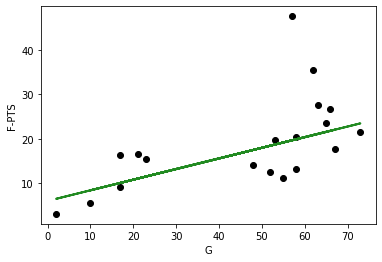

0.31319588365416084


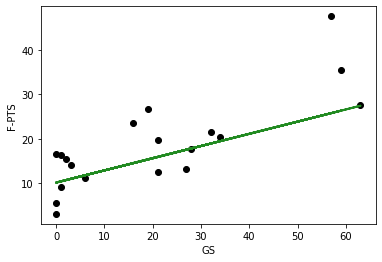

0.49057788814397396


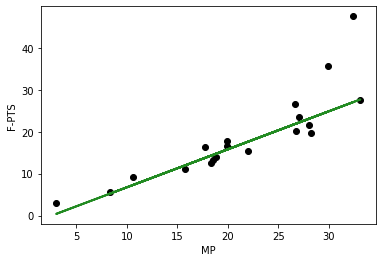

0.6893590036421899


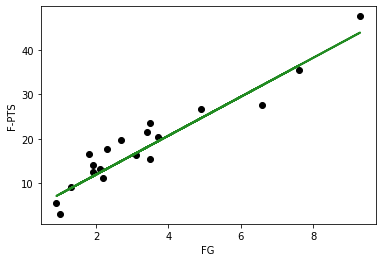

0.9024277785076166


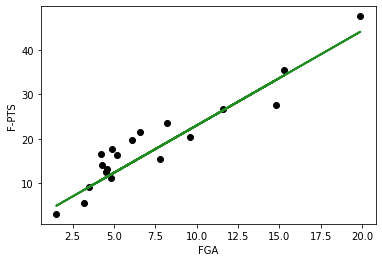

0.8772003939366102


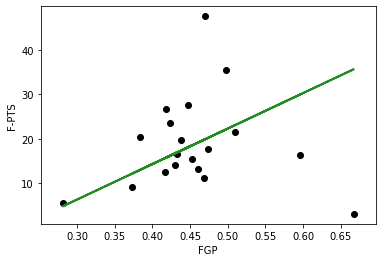

-0.3527688133597495


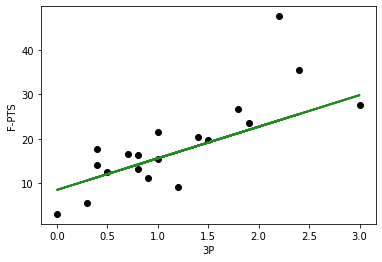

0.5329404101629209


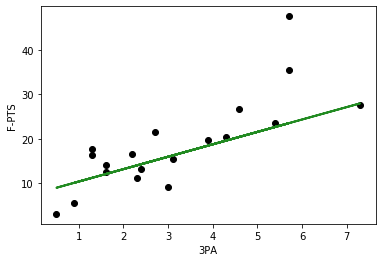

0.491052974105449


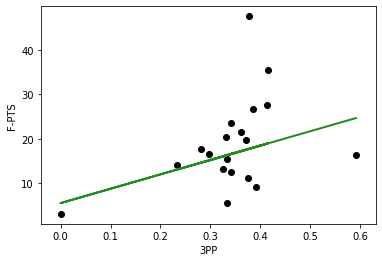

0.11013718276041384


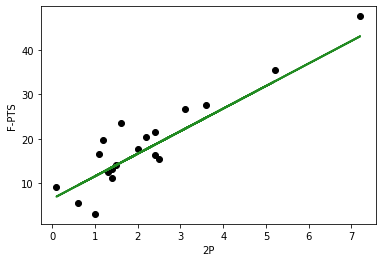

0.8274029973501582


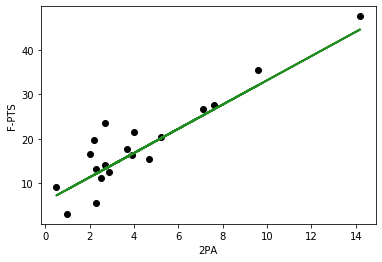

0.8283469032035352


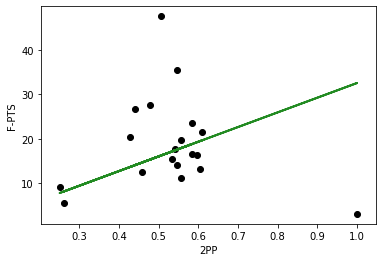

-0.36098159100868243


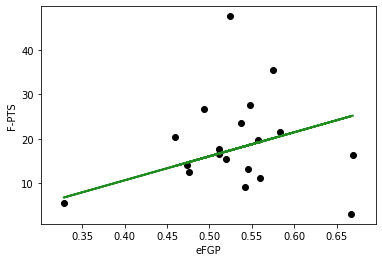

-0.10274966439055433


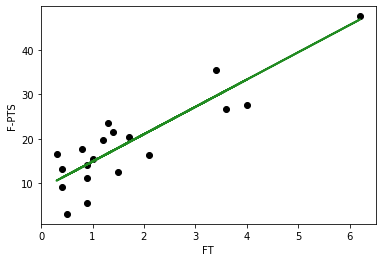

0.7750090560030554


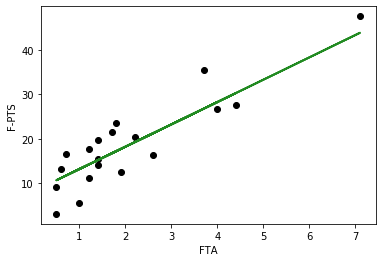

0.7943286060500753


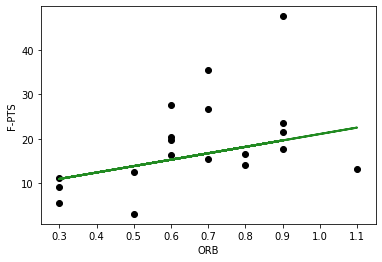

0.13133508038997543


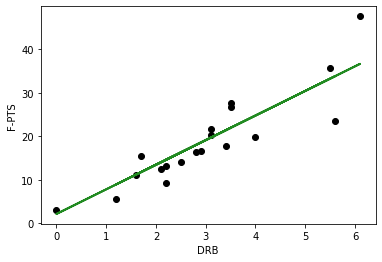

0.7973060406949531


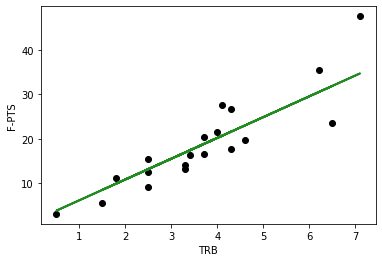

0.7837397227917524


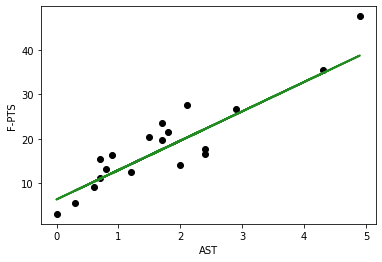

0.8251396850415196


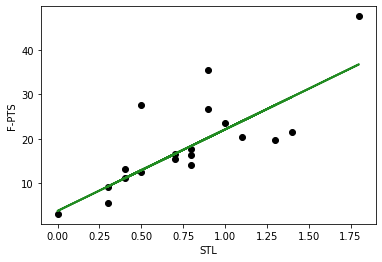

0.5998943024177512


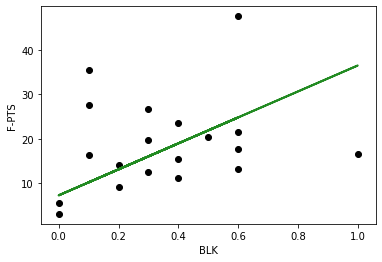

-0.20244481689241378


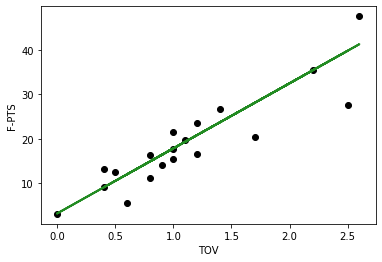

0.8026393086992086


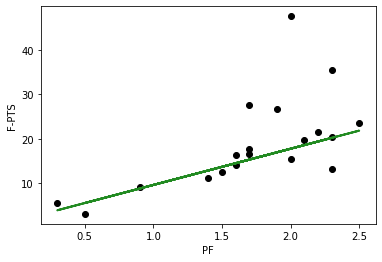

0.2598957815645103


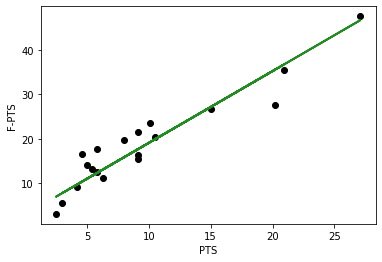

0.8860423433397699


In [18]:
# create df specifically for position
sf_df=df_players[df_players["POS"]=="SF"]

for x in stats:
    # re-shape array into single column
    X=sf_df[x].values.reshape(-1,1)
    y=sf_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="forestgreen",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_sf.append(score)
        relevant_stats_sf.append(x)

In [19]:
# rank stats by score
order_sf=[i for _,i in sorted(zip(score_sf,relevant_stats_sf),reverse=True)]
print()
print("RELEVANT STATS:",order_sf)


RELEVANT STATS: ['FG', 'PTS', 'FGA', '2PA', '2P', 'AST', 'TOV']


In [20]:
for y in order_sf:
    print("SORTED BY:",y)
    # sort by relevant stat
    sf_fpts=sf_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    sf_fpts=sf_fpts.loc[:,["Player",y,"F-PTS"]]
    # print top 25 players per stat
    display(sf_fpts.head(25).style.hide_index())
    print()

SORTED BY: FG


Player,FG,F-PTS
KAWHI LEONARD,9.300000,47.570000
DEMAR DEROZAN,8.200000,38.600000
ANDREW WIGGINS,8.100000,36.470000
T.J. WARREN,8.000000,30.890000
KHRIS MIDDLETON,7.600000,35.590000
GORDON HAYWARD,6.700000,33.190000
KELLY OUBRE JR.,6.700000,33.130000
BOJAN BOGDANOVIC,6.600000,27.570000
EVAN FOURNIER,6.600000,28.420000
JIMMY BUTLER,5.900000,41.940000



SORTED BY: PTS


Player,PTS,F-PTS
KAWHI LEONARD,27.100000,47.570000
DEMAR DEROZAN,22.100000,38.600000
ANDREW WIGGINS,21.800000,36.470000
KHRIS MIDDLETON,20.900000,35.590000
BOJAN BOGDANOVIC,20.200000,27.570000
JIMMY BUTLER,19.900000,41.940000
T.J. WARREN,19.800000,30.890000
KELLY OUBRE JR.,18.700000,33.130000
EVAN FOURNIER,18.500000,28.420000
GORDON HAYWARD,17.500000,33.190000



SORTED BY: FGA


Player,FGA,F-PTS
KAWHI LEONARD,19.900000,47.570000
ANDREW WIGGINS,18.100000,36.470000
DEMAR DEROZAN,15.400000,38.600000
KHRIS MIDDLETON,15.300000,35.590000
T.J. WARREN,14.900000,30.890000
KELLY OUBRE JR.,14.800000,33.130000
BOJAN BOGDANOVIC,14.800000,27.570000
EVAN FOURNIER,14.100000,28.420000
GORDON HAYWARD,13.500000,33.190000
MARCUS MORRIS,13.100000,27.100000



SORTED BY: 2PA


Player,2PA,F-PTS
DEMAR DEROZAN,14.900000,38.600000
KAWHI LEONARD,14.200000,47.570000
ANDREW WIGGINS,11.900000,36.470000
T.J. WARREN,11.500000,30.890000
JIMMY BUTLER,11.000000,41.940000
KHRIS MIDDLETON,9.600000,35.590000
KELLY OUBRE JR.,9.300000,33.130000
GORDON HAYWARD,9.200000,33.190000
WILL BARTON,7.800000,31.510000
BOJAN BOGDANOVIC,7.600000,27.570000



SORTED BY: 2P


Player,2P,F-PTS
DEMAR DEROZAN,8.100000,38.600000
KAWHI LEONARD,7.200000,47.570000
T.J. WARREN,6.600000,30.890000
ANDREW WIGGINS,6.000000,36.470000
JIMMY BUTLER,5.400000,41.940000
KHRIS MIDDLETON,5.200000,35.590000
GORDON HAYWARD,5.100000,33.190000
KELLY OUBRE JR.,4.700000,33.130000
EVAN FOURNIER,4.000000,28.420000
WILL BARTON,3.900000,31.510000



SORTED BY: AST


Player,AST,F-PTS
JIMMY BUTLER,6.000000,41.940000
DEMAR DEROZAN,5.600000,38.600000
KAWHI LEONARD,4.900000,47.570000
KHRIS MIDDLETON,4.300000,35.590000
GORDON HAYWARD,4.100000,33.190000
ANDREW WIGGINS,3.700000,36.470000
WILL BARTON,3.700000,31.510000
EVAN FOURNIER,3.200000,28.420000
NICOLAS BATUM,3.000000,16.100000
ALEC BURKS,2.900000,26.710000



SORTED BY: TOV


Player,TOV,F-PTS
KAWHI LEONARD,2.600000,47.570000
BOJAN BOGDANOVIC,2.500000,27.570000
DEMAR DEROZAN,2.400000,38.600000
ANDREW WIGGINS,2.400000,36.470000
KHRIS MIDDLETON,2.200000,35.590000
JIMMY BUTLER,2.200000,41.940000
EVAN FOURNIER,1.900000,28.420000
KEVIN PORTER JR.,1.900000,18.840000
GORDON HAYWARD,1.800000,33.190000
CAM REDDISH,1.700000,20.290000


## POWER FORWARD

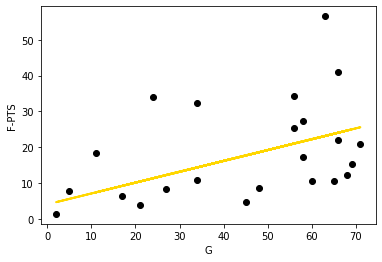

0.14804223887093548


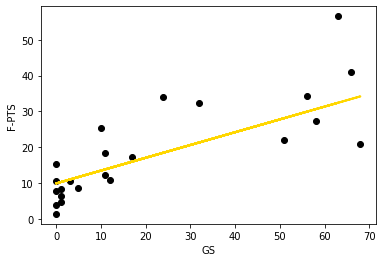

0.6122761592801887


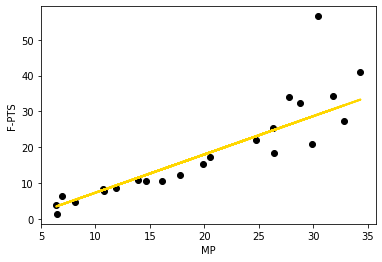

0.743463682035647


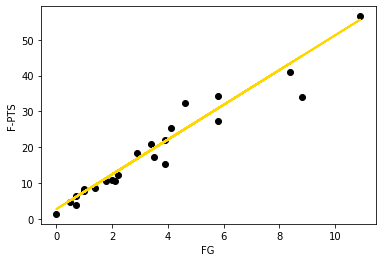

0.9290977875661696


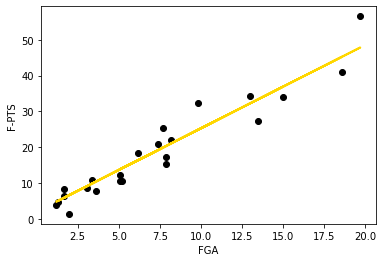

0.9175241101340175


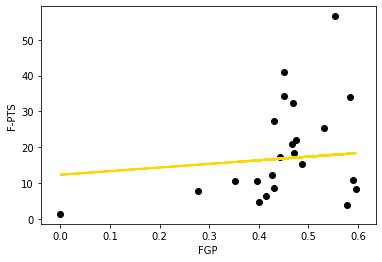

0.0419662450008329


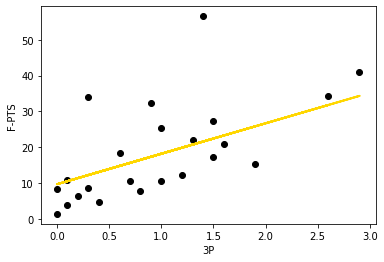

0.3652465137934552


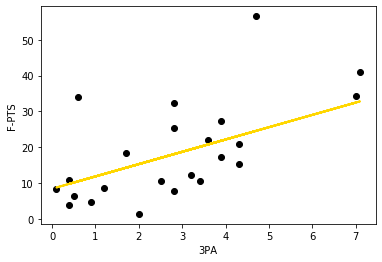

0.3677940919796516


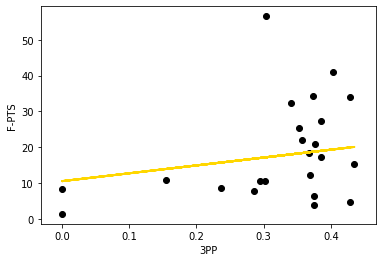

0.09265296212223295


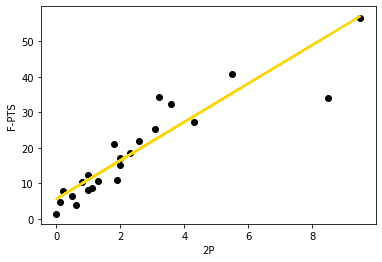

0.8383167566171658


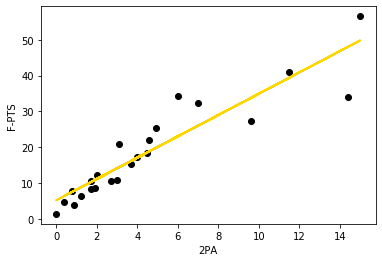

0.8549003172242071


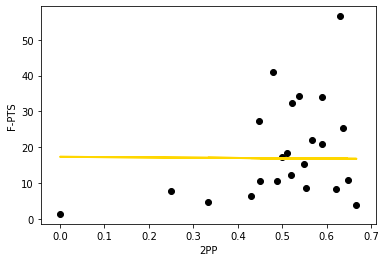

-0.024252724150826355


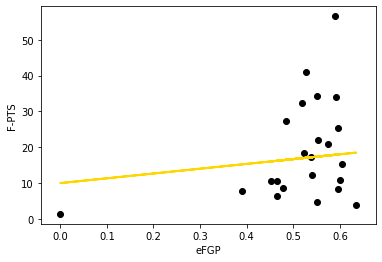

0.05153637762159313


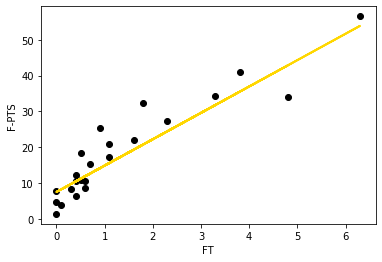

0.8589474123747686


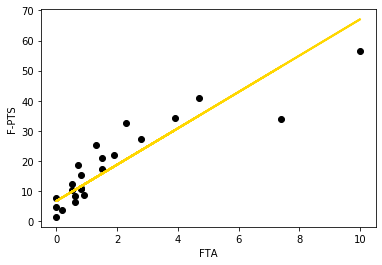

0.7744833673068222


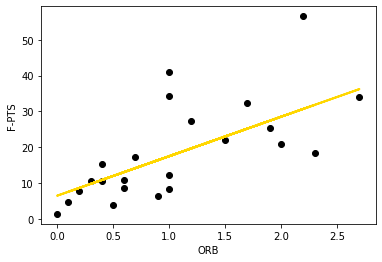

0.4676385898231854


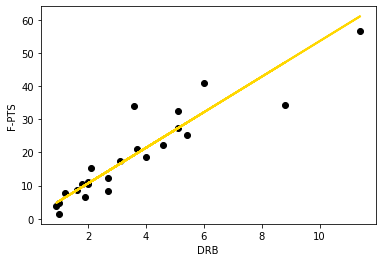

0.8495764498858607


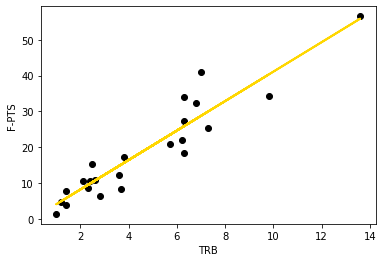

0.8818167841833031


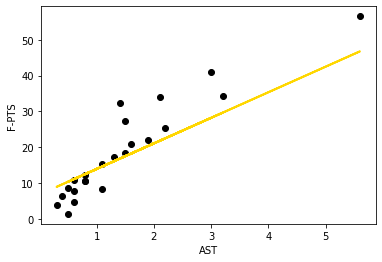

0.7573584706250969


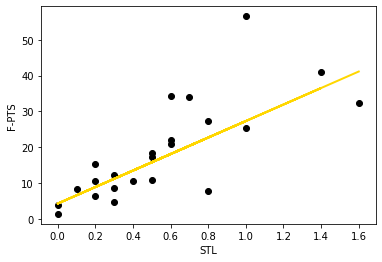

0.5631371652819981


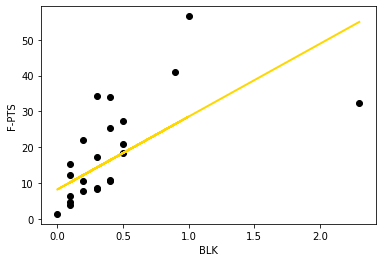

0.3285739916371945


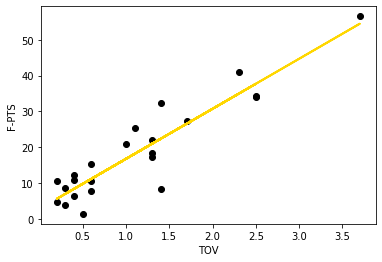

0.852075038079984


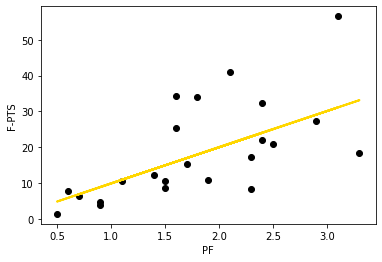

0.4075594712051168


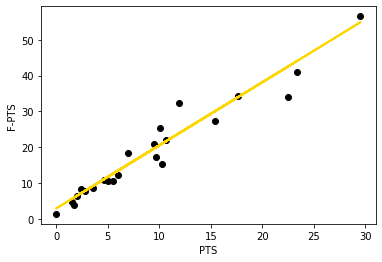

0.9383356408951943


In [21]:
# create df specifically for position
pf_df=df_players[df_players["POS"]=="PF"]

for x in stats:
    # re-shape array into single column
    X=pf_df[x].values.reshape(-1,1)
    y=pf_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="gold",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_pf.append(score)
        relevant_stats_pf.append(x)

In [22]:
# rank stats by score
order_pf=[i for _,i in sorted(zip(score_pf,relevant_stats_pf),reverse=True)]
print()
print("RELEVANT STATS:",order_pf)


RELEVANT STATS: ['PTS', 'FG', 'FGA', 'TRB', 'FT', '2PA', 'TOV', 'DRB', '2P']


In [23]:
for y in order_pf:
    print("SORTED BY:",y)
    # sort by relevant stat
    pf_fpts=pf_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    pf_fpts=pf_fpts.loc[:,["Player",y,"F-PTS"]]
    # print top 25 players per stat
    display(pf_fpts.head(25).style.hide_index())
    print()

SORTED BY: PTS


Player,PTS,F-PTS
GIANNIS ANTETOKOUNMPO,29.500000,56.520000
ANTHONY DAVIS,26.100000,50.960000
BRANDON INGRAM,23.800000,39.220000
JAYSON TATUM,23.400000,40.900000
PASCAL SIAKAM,22.900000,40.110000
ZION WILLIAMSON,22.500000,34.010000
JOHN COLLINS,21.600000,41.370000
TOBIAS HARRIS,19.600000,35.180000
JULIUS RANDLE,19.500000,36.090000
DANILO GALLINARI,18.700000,28.990000



SORTED BY: FG


Player,FG,F-PTS
GIANNIS ANTETOKOUNMPO,10.900000,56.520000
ANTHONY DAVIS,8.900000,50.960000
ZION WILLIAMSON,8.800000,34.010000
JOHN COLLINS,8.600000,41.370000
JAYSON TATUM,8.400000,40.900000
PASCAL SIAKAM,8.300000,40.110000
BRANDON INGRAM,8.200000,39.220000
TOBIAS HARRIS,7.700000,35.180000
DOMANTAS SABONIS,7.400000,42.080000
JULIUS RANDLE,7.200000,36.090000



SORTED BY: FGA


Player,FGA,F-PTS
GIANNIS ANTETOKOUNMPO,19.700000,56.520000
JAYSON TATUM,18.600000,40.900000
PASCAL SIAKAM,18.400000,40.110000
ANTHONY DAVIS,17.700000,50.960000
BRANDON INGRAM,17.700000,39.220000
TOBIAS HARRIS,16.300000,35.180000
JULIUS RANDLE,15.700000,36.090000
ZION WILLIAMSON,15.000000,34.010000
JOHN COLLINS,14.800000,41.370000
BLAKE GRIFFIN,13.900000,26.290000



SORTED BY: TRB


Player,TRB,F-PTS
GIANNIS ANTETOKOUNMPO,13.600000,56.520000
DOMANTAS SABONIS,12.400000,42.080000
BAM ADEBAYO,10.200000,40.190000
JOHN COLLINS,10.100000,41.370000
TRISTAN THOMPSON,10.100000,29.970000
KEVIN LOVE,9.800000,34.360000
JULIUS RANDLE,9.700000,36.090000
ANTHONY DAVIS,9.300000,50.960000
AARON GORDON,7.700000,31.790000
PASCAL SIAKAM,7.300000,40.110000



SORTED BY: FT


Player,FT,F-PTS
ANTHONY DAVIS,7.200000,50.960000
GIANNIS ANTETOKOUNMPO,6.300000,56.520000
BRANDON INGRAM,5.000000,39.220000
ZION WILLIAMSON,4.800000,34.010000
DANILO GALLINARI,4.300000,28.990000
BLAKE GRIFFIN,4.200000,26.290000
PASCAL SIAKAM,4.000000,40.110000
JULIUS RANDLE,4.000000,36.090000
JAYSON TATUM,3.800000,40.900000
BAM ADEBAYO,3.700000,40.190000



SORTED BY: 2PA


Player,2PA,F-PTS
GIANNIS ANTETOKOUNMPO,15.000000,56.520000
ZION WILLIAMSON,14.400000,34.010000
ANTHONY DAVIS,14.200000,50.960000
DOMANTAS SABONIS,12.600000,42.080000
PASCAL SIAKAM,12.300000,40.110000
JULIUS RANDLE,12.100000,36.090000
JAYSON TATUM,11.500000,40.900000
BRANDON INGRAM,11.500000,39.220000
TOBIAS HARRIS,11.300000,35.180000
JOHN COLLINS,11.200000,41.370000



SORTED BY: TOV


Player,TOV,F-PTS
GIANNIS ANTETOKOUNMPO,3.700000,56.520000
BRANDON INGRAM,3.000000,39.220000
JULIUS RANDLE,3.000000,36.090000
BAM ADEBAYO,2.800000,40.190000
DOMANTAS SABONIS,2.700000,42.080000
PASCAL SIAKAM,2.500000,40.110000
KEVIN LOVE,2.500000,34.360000
ZION WILLIAMSON,2.500000,34.010000
ANTHONY DAVIS,2.500000,50.960000
JAYSON TATUM,2.300000,40.900000



SORTED BY: DRB


Player,DRB,F-PTS
GIANNIS ANTETOKOUNMPO,11.400000,56.520000
DOMANTAS SABONIS,9.400000,42.080000
KEVIN LOVE,8.800000,34.360000
BAM ADEBAYO,7.800000,40.190000
JULIUS RANDLE,7.400000,36.090000
JOHN COLLINS,7.300000,41.370000
ANTHONY DAVIS,7.000000,50.960000
PASCAL SIAKAM,6.300000,40.110000
TRISTAN THOMPSON,6.200000,29.970000
JAYSON TATUM,6.000000,40.900000



SORTED BY: 2P


Player,2P,F-PTS
GIANNIS ANTETOKOUNMPO,9.500000,56.520000
ZION WILLIAMSON,8.500000,34.010000
ANTHONY DAVIS,7.700000,50.960000
JOHN COLLINS,7.200000,41.370000
DOMANTAS SABONIS,7.100000,42.080000
PASCAL SIAKAM,6.200000,40.110000
JULIUS RANDLE,6.200000,36.090000
BAM ADEBAYO,6.100000,40.190000
TOBIAS HARRIS,5.900000,35.180000
BRANDON INGRAM,5.800000,39.220000


## FORWARD (SF, PF)

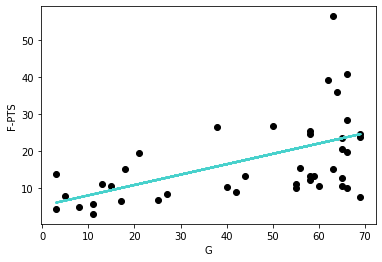

0.24956958987487887


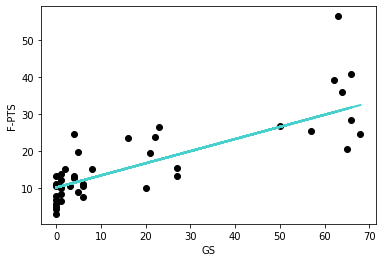

0.6491688572956372


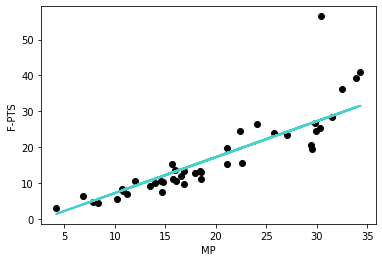

0.7444492151905906


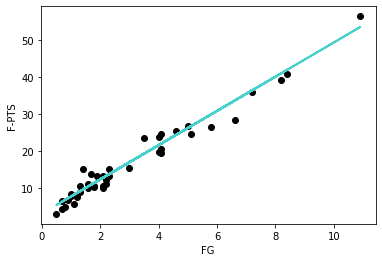

0.9634574784313326


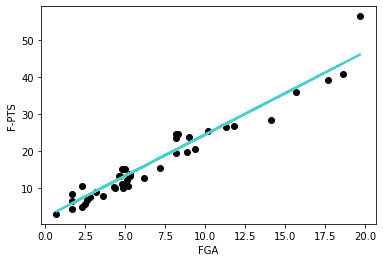

0.9392383691992142


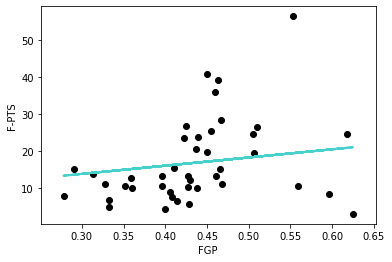

0.0794402952447546


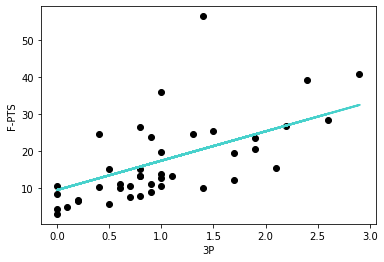

0.39761969972883027


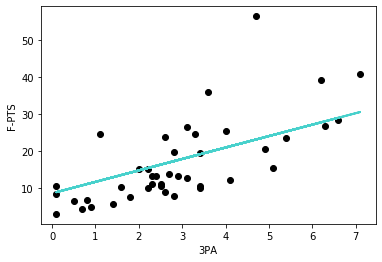

0.4467054377047408


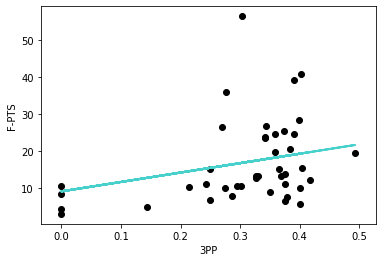

0.11510028081950718


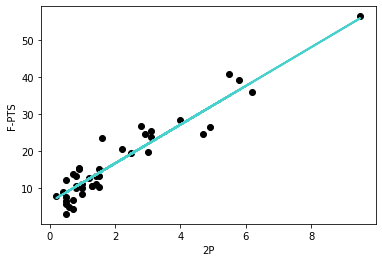

0.9047226645369836


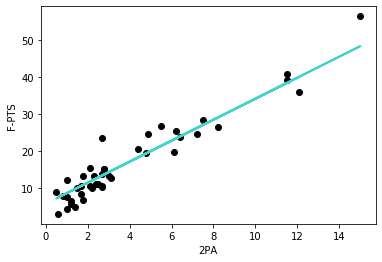

0.9133336564569052


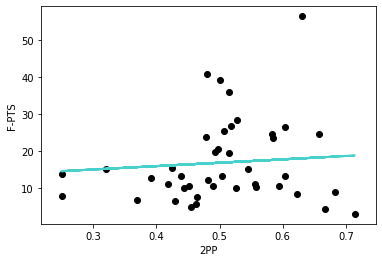

0.0216040115567131


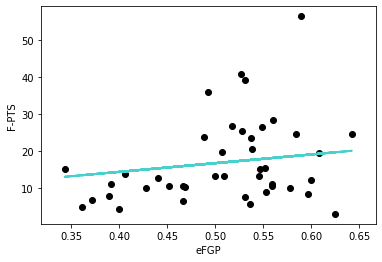

0.075661262432832


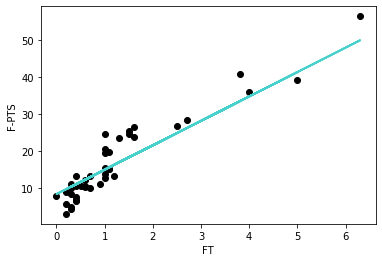

0.8619023982870416


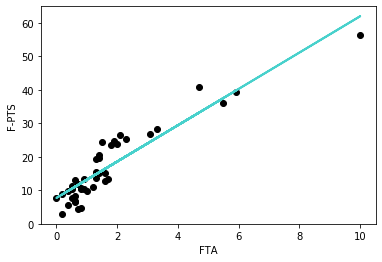

0.8634918029583216


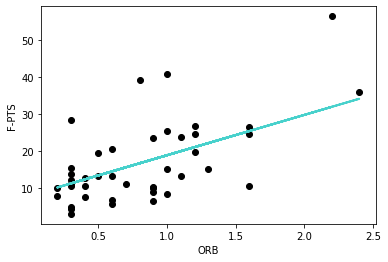

0.37737958629326895


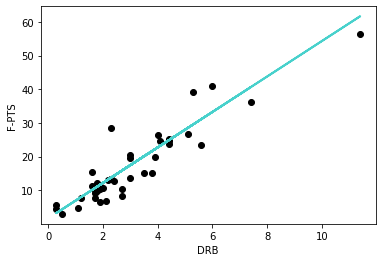

0.8449353336315748


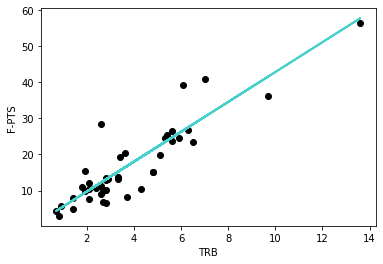

0.8016058417001596


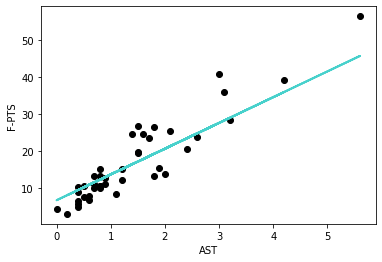

0.8135675776188492


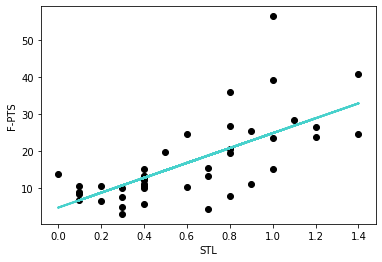

0.47750372970643506


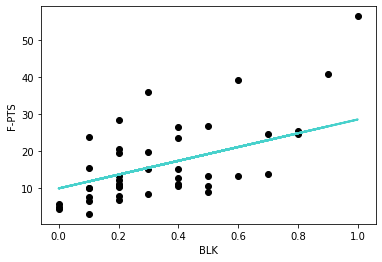

0.3789025720336132


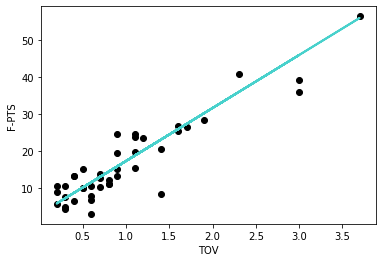

0.8364923639863246


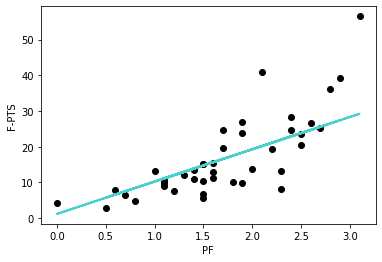

0.55441465859979


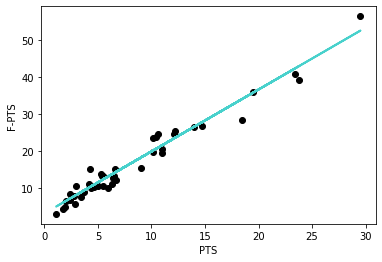

0.9616319933024159


In [24]:
# combine dataframes 
f_df=pd.concat([sf_df, pf_df], ignore_index=True)

for x in stats:
    # re-shape array into single column
    X=f_df[x].values.reshape(-1,1)
    y=f_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="mediumturquoise",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_f.append(score)
        relevant_stats_f.append(x)

In [25]:
# rank stats by score
order_f=[i for _,i in sorted(zip(score_f,relevant_stats_f),reverse=True)]
print()
print("RELEVANT STATS:",order_f)


RELEVANT STATS: ['FG', 'PTS', 'FGA', '2PA', '2P', 'FTA', 'FT', 'DRB', 'TOV', 'AST', 'TRB']


In [26]:
for y in order_f:
    print("SORTED BY:",y)
    # sort by relevant stat
    f_fpts=f_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    f_fpts=f_fpts.loc[:,["Player","POS",y,"F-PTS"]]
    # print top 25 players per stat
    display(f_fpts.head(25).style.hide_index())
    print()

SORTED BY: FG


Player,POS,FG,F-PTS
GIANNIS ANTETOKOUNMPO,PF,10.900000,56.520000
KAWHI LEONARD,SF,9.300000,47.570000
ANTHONY DAVIS,PF,8.900000,50.960000
ZION WILLIAMSON,PF,8.800000,34.010000
JOHN COLLINS,PF,8.600000,41.370000
JAYSON TATUM,PF,8.400000,40.900000
PASCAL SIAKAM,PF,8.300000,40.110000
DEMAR DEROZAN,SF,8.200000,38.600000
BRANDON INGRAM,PF,8.200000,39.220000
ANDREW WIGGINS,SF,8.100000,36.470000



SORTED BY: PTS


Player,POS,PTS,F-PTS
GIANNIS ANTETOKOUNMPO,PF,29.500000,56.520000
KAWHI LEONARD,SF,27.100000,47.570000
ANTHONY DAVIS,PF,26.100000,50.960000
BRANDON INGRAM,PF,23.800000,39.220000
JAYSON TATUM,PF,23.400000,40.900000
PASCAL SIAKAM,PF,22.900000,40.110000
ZION WILLIAMSON,PF,22.500000,34.010000
DEMAR DEROZAN,SF,22.100000,38.600000
ANDREW WIGGINS,SF,21.800000,36.470000
JOHN COLLINS,PF,21.600000,41.370000



SORTED BY: FGA


Player,POS,FGA,F-PTS
KAWHI LEONARD,SF,19.900000,47.570000
GIANNIS ANTETOKOUNMPO,PF,19.700000,56.520000
JAYSON TATUM,PF,18.600000,40.900000
PASCAL SIAKAM,PF,18.400000,40.110000
ANDREW WIGGINS,SF,18.100000,36.470000
BRANDON INGRAM,PF,17.700000,39.220000
ANTHONY DAVIS,PF,17.700000,50.960000
TOBIAS HARRIS,PF,16.300000,35.180000
JULIUS RANDLE,PF,15.700000,36.090000
DEMAR DEROZAN,SF,15.400000,38.600000



SORTED BY: 2PA


Player,POS,2PA,F-PTS
GIANNIS ANTETOKOUNMPO,PF,15.000000,56.520000
DEMAR DEROZAN,SF,14.900000,38.600000
ZION WILLIAMSON,PF,14.400000,34.010000
KAWHI LEONARD,SF,14.200000,47.570000
ANTHONY DAVIS,PF,14.200000,50.960000
DOMANTAS SABONIS,PF,12.600000,42.080000
PASCAL SIAKAM,PF,12.300000,40.110000
JULIUS RANDLE,PF,12.100000,36.090000
ANDREW WIGGINS,SF,11.900000,36.470000
T.J. WARREN,SF,11.500000,30.890000



SORTED BY: 2P


Player,POS,2P,F-PTS
GIANNIS ANTETOKOUNMPO,PF,9.500000,56.520000
ZION WILLIAMSON,PF,8.500000,34.010000
DEMAR DEROZAN,SF,8.100000,38.600000
ANTHONY DAVIS,PF,7.700000,50.960000
JOHN COLLINS,PF,7.200000,41.370000
KAWHI LEONARD,SF,7.200000,47.570000
DOMANTAS SABONIS,PF,7.100000,42.080000
T.J. WARREN,SF,6.600000,30.890000
PASCAL SIAKAM,PF,6.200000,40.110000
JULIUS RANDLE,PF,6.200000,36.090000



SORTED BY: FTA


Player,POS,FTA,F-PTS
GIANNIS ANTETOKOUNMPO,PF,10.000000,56.520000
JIMMY BUTLER,SF,9.100000,41.940000
ANTHONY DAVIS,PF,8.500000,50.960000
ZION WILLIAMSON,PF,7.400000,34.010000
KAWHI LEONARD,SF,7.100000,47.570000
DEMAR DEROZAN,SF,6.600000,38.600000
BRANDON INGRAM,PF,5.900000,39.220000
JULIUS RANDLE,PF,5.500000,36.090000
BLAKE GRIFFIN,PF,5.400000,26.290000
BAM ADEBAYO,PF,5.300000,40.190000



SORTED BY: FT


Player,POS,FT,F-PTS
JIMMY BUTLER,SF,7.600000,41.940000
ANTHONY DAVIS,PF,7.200000,50.960000
GIANNIS ANTETOKOUNMPO,PF,6.300000,56.520000
KAWHI LEONARD,SF,6.200000,47.570000
DEMAR DEROZAN,SF,5.600000,38.600000
BRANDON INGRAM,PF,5.000000,39.220000
ZION WILLIAMSON,PF,4.800000,34.010000
DANILO GALLINARI,PF,4.300000,28.990000
BLAKE GRIFFIN,PF,4.200000,26.290000
JULIUS RANDLE,PF,4.000000,36.090000



SORTED BY: DRB


Player,POS,DRB,F-PTS
GIANNIS ANTETOKOUNMPO,PF,11.400000,56.520000
DOMANTAS SABONIS,PF,9.400000,42.080000
KEVIN LOVE,PF,8.800000,34.360000
BAM ADEBAYO,PF,7.800000,40.190000
JULIUS RANDLE,PF,7.400000,36.090000
JOHN COLLINS,PF,7.300000,41.370000
ANTHONY DAVIS,PF,7.000000,50.960000
PASCAL SIAKAM,PF,6.300000,40.110000
TRISTAN THOMPSON,PF,6.200000,29.970000
KAWHI LEONARD,SF,6.100000,47.570000



SORTED BY: TOV


Player,POS,TOV,F-PTS
GIANNIS ANTETOKOUNMPO,PF,3.700000,56.520000
JULIUS RANDLE,PF,3.000000,36.090000
BRANDON INGRAM,PF,3.000000,39.220000
BAM ADEBAYO,PF,2.800000,40.190000
DOMANTAS SABONIS,PF,2.700000,42.080000
KAWHI LEONARD,SF,2.600000,47.570000
BOJAN BOGDANOVIC,SF,2.500000,27.570000
ZION WILLIAMSON,PF,2.500000,34.010000
PASCAL SIAKAM,PF,2.500000,40.110000
ANTHONY DAVIS,PF,2.500000,50.960000



SORTED BY: AST


Player,POS,AST,F-PTS
DRAYMOND GREEN,PF,6.200000,29.040000
JIMMY BUTLER,SF,6.000000,41.940000
GIANNIS ANTETOKOUNMPO,PF,5.600000,56.520000
DEMAR DEROZAN,SF,5.600000,38.600000
JOE INGLES,PF,5.200000,23.580000
BAM ADEBAYO,PF,5.100000,40.190000
DOMANTAS SABONIS,PF,5.000000,42.080000
KAWHI LEONARD,SF,4.900000,47.570000
KHRIS MIDDLETON,SF,4.300000,35.590000
BRANDON INGRAM,PF,4.200000,39.220000



SORTED BY: TRB


Player,POS,TRB,F-PTS
GIANNIS ANTETOKOUNMPO,PF,13.600000,56.520000
DOMANTAS SABONIS,PF,12.400000,42.080000
BAM ADEBAYO,PF,10.200000,40.190000
TRISTAN THOMPSON,PF,10.100000,29.970000
JOHN COLLINS,PF,10.100000,41.370000
KEVIN LOVE,PF,9.800000,34.360000
JULIUS RANDLE,PF,9.700000,36.090000
ANTHONY DAVIS,PF,9.300000,50.960000
AARON GORDON,PF,7.700000,31.790000
LARRY NANCE JR.,PF,7.300000,25.260000


## CENTRE

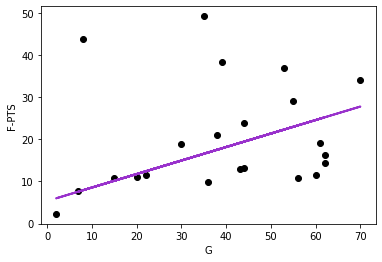

-0.10527429884625694


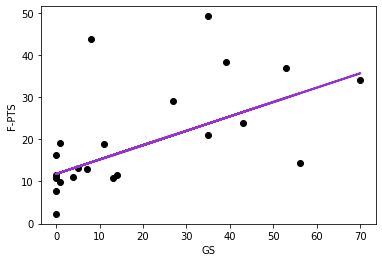

0.3191676704626446


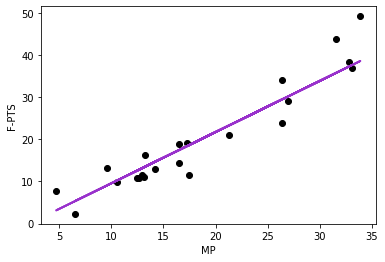

0.8912409802664115


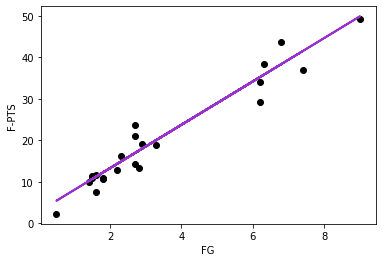

0.9366736472866891


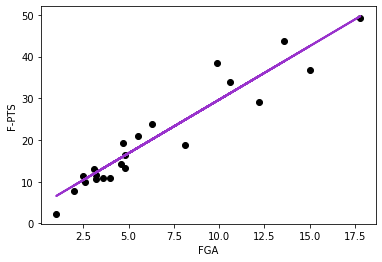

0.9124479273030589


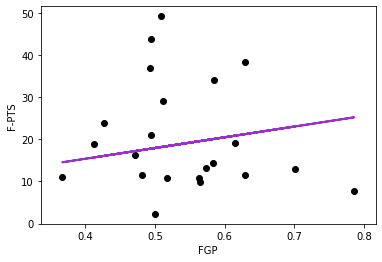

-0.10406582901546613


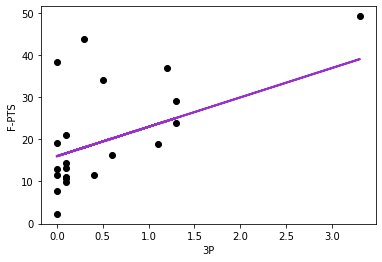

0.3546593752702688


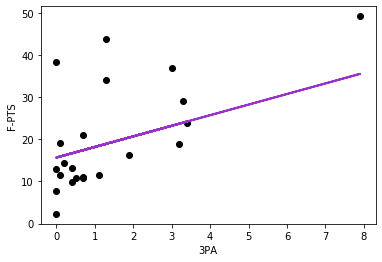

0.3243019206486827


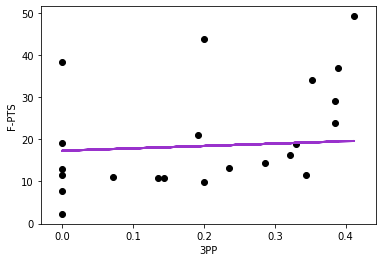

0.03584589858418541


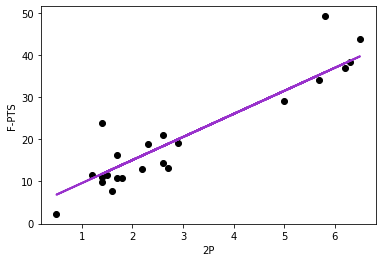

0.8555610966904242


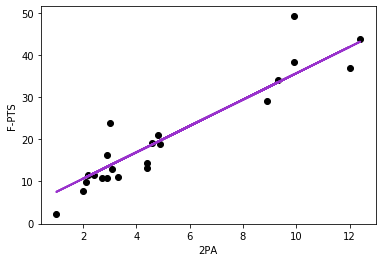

0.8688025549893339


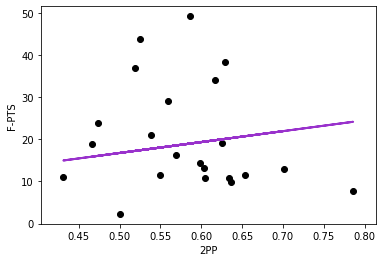

-0.09740291078779473


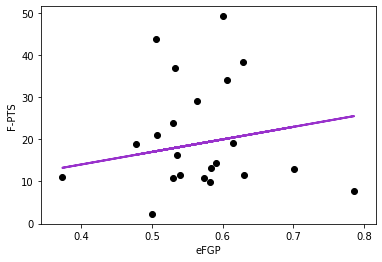

-0.057349697826252655


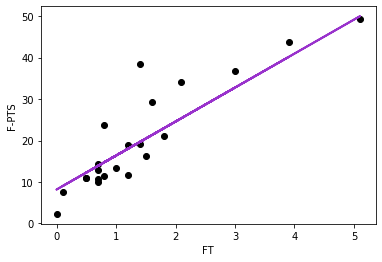

0.7809118159669395


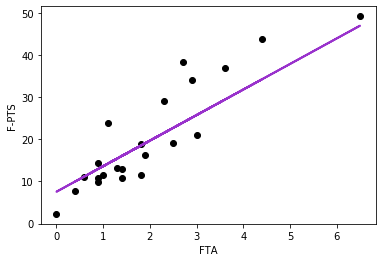

0.7741740620809436


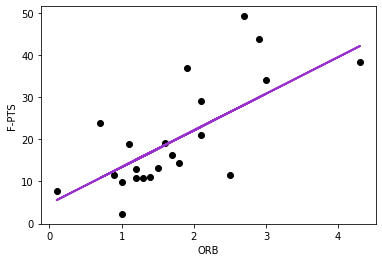

0.5198139719707053


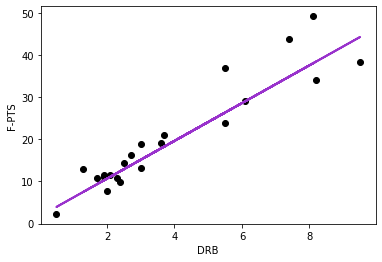

0.8653453078984786


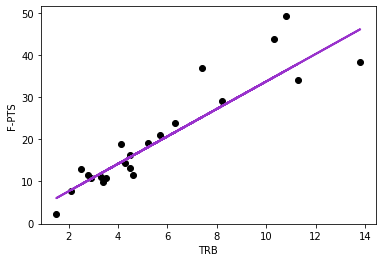

0.8395434071535224


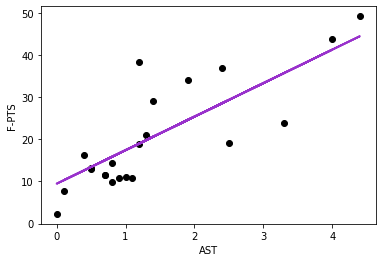

0.6659468411449305


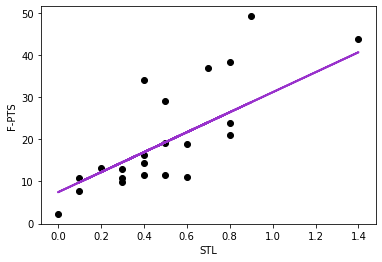

0.578475180880716


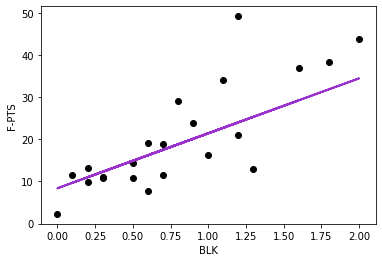

0.5801345555137492


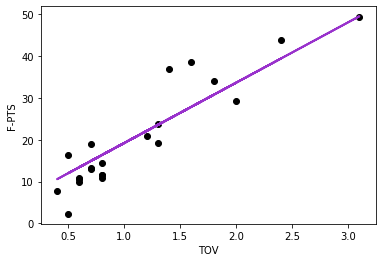

0.8336036373040083


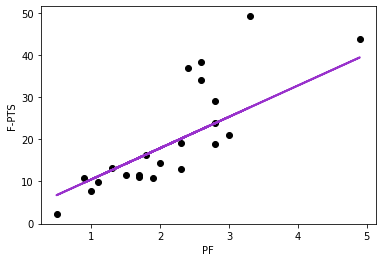

0.5959210309009735


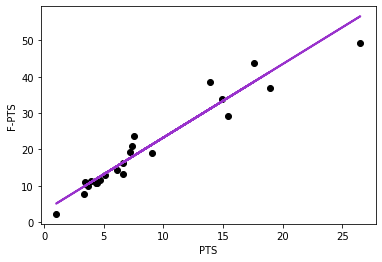

0.9261046410563369


In [27]:
# create df specifically for position
c_df=df_players[df_players["POS"]=="C"]

for x in stats:
    # re-shape array into single column
    X=c_df[x].values.reshape(-1,1)
    y=c_df["F-PTS"].values.reshape(-1,1)
    
    # Train/Test - 80/20 - seeded
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
     
    # plot
    plt.scatter(X_test,y_test,color="black")
    plt.plot(X_test,y_pred,color="darkorchid",linewidth=2)
    plt.xlabel(x)
    plt.ylabel("F-PTS")
    plt.show()
    score=regressor.score(X_test,y_test)
    print(score)
    # checking for relevant scores (over 80%)
    if score>=0.8:
        score_c.append(score)
        relevant_stats_c.append(x)

In [28]:
# rank stats by score
order_c=[i for _,i in sorted(zip(score_c,relevant_stats_c),reverse=True)]
print()
print("RELEVANT STATS:",order_c)


RELEVANT STATS: ['FG', 'PTS', 'FGA', 'MP', '2PA', 'DRB', '2P', 'TRB', 'TOV']


In [29]:
for y in order_c:
    print("SORTED BY:",y)
    # sort by relevant stat
    c_fpts=c_df.sort_values(by=y,ascending=False)
    # display player name, relevant stat, & fantasy points
    c_fpts=c_fpts.loc[:,["Player",y,"F-PTS"]]
    # print top 25 players per stat
    display(c_fpts.head(25).style.hide_index())
    print()

SORTED BY: FG


Player,FG,F-PTS
KARL-ANTHONY TOWNS,9.000000,49.260000
DEANDRE AYTON,8.200000,39.350000
NIKOLA VUCEVIC,8.000000,41.780000
NIKOLA JOKIĆ,7.700000,44.340000
JOEL EMBIID,7.500000,44.920000
MONTREZL HARRELL,7.500000,33.070000
LAMARCUS ALDRIDGE,7.400000,36.880000
ANDRE DRUMMOND,7.300000,46.890000
KRISTAPS PORZINGIS,7.000000,41.000000
JUSUF NURKIC,6.800000,43.760000



SORTED BY: PTS


Player,PTS,F-PTS
KARL-ANTHONY TOWNS,26.500000,49.260000
JOEL EMBIID,23.000000,44.920000
KRISTAPS PORZINGIS,20.400000,41.000000
NIKOLA JOKIĆ,19.900000,44.340000
NIKOLA VUCEVIC,19.600000,41.780000
LAMARCUS ALDRIDGE,18.900000,36.880000
MONTREZL HARRELL,18.600000,33.070000
DEANDRE AYTON,18.200000,39.350000
ANDRE DRUMMOND,17.700000,46.890000
JUSUF NURKIC,17.600000,43.760000



SORTED BY: FGA


Player,FGA,F-PTS
KARL-ANTHONY TOWNS,17.800000,49.260000
NIKOLA VUCEVIC,16.700000,41.780000
KRISTAPS PORZINGIS,16.400000,41.000000
JOEL EMBIID,15.700000,44.920000
LAMARCUS ALDRIDGE,15.000000,36.880000
DEANDRE AYTON,14.900000,39.350000
NIKOLA JOKIĆ,14.700000,44.340000
ANDRE DRUMMOND,13.800000,46.890000
JUSUF NURKIC,13.600000,43.760000
JAREN JACKSON JR.,13.200000,30.220000



SORTED BY: MP


Player,MP,F-PTS
RUDY GOBERT,34.300000,40.050000
KARL-ANTHONY TOWNS,33.900000,49.260000
LAMARCUS ALDRIDGE,33.100000,36.880000
ANDRE DRUMMOND,33.000000,46.890000
CLINT CAPELA,32.800000,38.460000
DEANDRE AYTON,32.500000,39.350000
NIKOLA VUCEVIC,32.200000,41.780000
NIKOLA JOKIĆ,32.000000,44.340000
KRISTAPS PORZINGIS,31.800000,41.000000
JUSUF NURKIC,31.600000,43.760000



SORTED BY: 2PA


Player,2PA,F-PTS
DEANDRE AYTON,14.600000,39.350000
ANDRE DRUMMOND,13.100000,46.890000
MONTREZL HARRELL,12.600000,33.070000
JUSUF NURKIC,12.400000,43.760000
JOEL EMBIID,12.300000,44.920000
NIKOLA VUCEVIC,12.000000,41.780000
LAMARCUS ALDRIDGE,12.000000,36.880000
NIKOLA JOKIĆ,11.200000,44.340000
MARVIN BAGLEY III,11.200000,27.200000
HASSAN WHITESIDE,10.400000,41.600000



SORTED BY: DRB


Player,DRB,F-PTS
ANDRE DRUMMOND,10.800000,46.890000
RUDY GOBERT,10.100000,40.050000
HASSAN WHITESIDE,9.700000,41.600000
CLINT CAPELA,9.500000,38.460000
JOEL EMBIID,8.900000,44.920000
NIKOLA VUCEVIC,8.600000,41.780000
JONAS VALANCIUNAS,8.200000,34.010000
KARL-ANTHONY TOWNS,8.100000,49.260000
KRISTAPS PORZINGIS,7.700000,41.000000
DEANDRE AYTON,7.600000,39.350000



SORTED BY: 2P


Player,2P,F-PTS
DEANDRE AYTON,8.100000,39.350000
MONTREZL HARRELL,7.500000,33.070000
ANDRE DRUMMOND,7.200000,46.890000
NIKOLA JOKIĆ,6.600000,44.340000
JUSUF NURKIC,6.500000,43.760000
JOEL EMBIID,6.400000,44.920000
NIKOLA VUCEVIC,6.400000,41.780000
HASSAN WHITESIDE,6.400000,41.600000
CLINT CAPELA,6.300000,38.460000
LAMARCUS ALDRIDGE,6.200000,36.880000



SORTED BY: TRB


Player,TRB,F-PTS
ANDRE DRUMMOND,15.200000,46.890000
CLINT CAPELA,13.800000,38.460000
RUDY GOBERT,13.500000,40.050000
HASSAN WHITESIDE,13.500000,41.600000
JOEL EMBIID,11.600000,44.920000
DEANDRE AYTON,11.500000,39.350000
JONAS VALANCIUNAS,11.300000,34.010000
NIKOLA VUCEVIC,10.900000,41.780000
KARL-ANTHONY TOWNS,10.800000,49.260000
JUSUF NURKIC,10.300000,43.760000



SORTED BY: TOV


Player,TOV,F-PTS
ANDRE DRUMMOND,3.600000,46.890000
KARL-ANTHONY TOWNS,3.100000,49.260000
JOEL EMBIID,3.100000,44.920000
NIKOLA JOKIĆ,3.100000,44.340000
JUSUF NURKIC,2.400000,43.760000
DEANDRE AYTON,2.100000,39.350000
SERGE IBAKA,2.000000,29.240000
RUDY GOBERT,1.900000,40.050000
JONAS VALANCIUNAS,1.800000,34.010000
HASSAN WHITESIDE,1.800000,41.600000


In [ ]:
import warnings
warnings.filterwarnings("ignore")
pg_fpts2=pg_df.sort_values(by=order_pg[0],ascending=False)
sg_fpts2=sg_df.sort_values(by=order_sg[0],ascending=False)
sf_fpts2=sf_df.sort_values(by=order_sf[0],ascending=False)
pf_fpts2=pf_df.sort_values(by=order_pf[0],ascending=False)
c_fpts2=c_df.sort_values(by=order_c[0],ascending=False)
ovr_df4=ovr_df.sort_values(by=order_ovr[0],ascending=False)
g_fpts2=g_df.sort_values(by=order_g[0],ascending=False)
f_fpts2=f_df.sort_values(by=order_g[0],ascending=False)

import string
dd=""
while dd!="draft" or dd!="drop" or dd!="done" or dd!="find":
    dd=input("Draft/Drop/Find: ").lower()
    if dd=="draft":
        pos=""
        while pos!="pg" or pos!="sg" or pos!="sf" or pos!="pf" or pos!="c":
            pos=input("POS: ").lower()
            if pos=="pg" or pos=="point guard" or pos=="1":
                display(pg_fpts2.head(1).style.hide_index())
            elif pos=="sg" or pos=="shooting guard" or pos=="2":
                display(sg_fpts2.head(1).style.hide_index())
            elif pos=="sf" or pos=="small forward" or pos=="3":
                display(sf_fpts2.head(1).style.hide_index())
            elif pos=="pf" or pos=="power forward" or pos=="4":
                display(pf_fpts2.head(1).style.hide_index())
            elif pos=="c" or pos=="center" or pos=="5":
                display(c_fpts2.head(1).style.hide_index()) 
            elif pos=="g" or pos=="guard":
                display(g_fpts2.head(1).style.hide_index())
            elif pos=="f" or pos=="forward":
                display(f_fpts2.head(1).style.hide_index())
            elif pos=="any":
                display(ovr_df4.head(1).style.hide_index()) 
            elif pos=="back":
                break
    if dd=="drop":
        drop=""
        while drop!="BACK":
            drop=input("PLAYER: ").upper()
            for i, row in pg_fpts.iterrows():
                if row["Player"]==drop: 
                    g_fpts2=g_fpts2[g_fpts.Player!=drop]
                    pg_fpts2=pg_fpts2[pg_fpts.Player!=drop]
                    ovr_df4=ovr_df4[ovr_df4.Player!=drop]
                    print("Sucessfully dropped:",drop)
            for i, row in sg_fpts.iterrows():
                if row["Player"]==drop: 
                    g_fpts2=g_fpts2[g_fpts.Player!=drop]
                    sg_fpts2=sg_fpts2[sg_fpts2.Player!=drop]
                    ovr_df4=ovr_df4[ovr_df4.Player!=drop]
                    print("Sucessfully dropped:",drop)
            for i, row in sf_fpts.iterrows():
                if row["Player"]==drop: 
                    f_fpts2=f_fpts2[f_fpts.Player!=drop]
                    sf_fpts2=sf_fpts2[sf_fpts2.Player!=drop]
                    ovr_df4=ovr_df4[ovr_df4.Player!=drop]
                    print("Sucessfully dropped:",drop)
            for i, row in pf_fpts.iterrows():
                if row["Player"]==drop: 
                    f_fpts2=f_fpts2[f_fpts.Player!=drop]
                    pf_fpts2=pf_fpts2[pf_fpts2.Player!=drop]
                    ovr_df4=ovr_df4[ovr_df4.Player!=drop]
                    print("Sucessfully dropped:",drop)
            for i, row in c_fpts.iterrows():
                if row["Player"]==drop: 
                    c_fpts2=c_fpts2[c_fpts2.Player!=drop]
                    ovr_df4=ovr_df4[ovr_df4.Player!=drop]
                    print("Sucessfully dropped:",drop)
    if dd=="find":
        drop=""
        while drop!="BACK":
            drop=input("PLAYER: ").upper()
            find=ovr_df4.loc[ovr_df4["Player"]==drop]
            display(find.style.hide_index())
    if dd=="done" or dd=="end":
        break